<a href="https://colab.research.google.com/github/CodeChef-1/Comp-215/blob/main/Project_KT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to my project!

though I not the most familiar with investing, this topic has always intreaged me.

After doing some research, I have decided on creating a program that analyzes the trends of certain stocks by plotting all their charts and finding intercetions of certain behaviors and patterns

Remeber old data and patterns do not correlate with future results,
nothing from this project have I actually used to trade.



*   -Neuralnine on youtube inspired lots of my work.
*   -Chatgpt corrected and styled my graphs along with helping me with formatting my data especially when converting data types.

Additional explainations on code segements are commented on using #s


In [ ]:
#documentation for the libraires im using
#https://yfinance-python.org/

# Starting off with some imports,

I will be using Seaborn for my graphing since it has a more polished look compared to matplotlib, Seaborn itself is also built off of matplotlib,
for other graphs such as ones used in a animation, I will defualt back to matplotlib.

Yes, theres a lot of imports

In [ ]:
import seaborn as sns
import numpy as np
#import json
#import requests
from pprint import pprint
import pandas as pd
import datetime as dt
#!pip install pandas_datareader
#!pip install yfinance
import pandas_datareader as web
import yfinance as yf
#from sklearn.linear_model import LinearRegression
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
#below is depreciated, not using this api anymore
#my API key UEH5GEX3HI6Z0YH5, for alphavantage
#https://www.alphavantage.co/documentation/

Everything that has been commented out are libraries or APIs that had to many restrictions or limits, I dropped them but still have them here to show my progress.

Here is a quick test of the "yfinace" library, its an library that will pull info off of yahoo finance to help me get data. I chose this since it as free and I dont plan on running my model off of live data anyways.

In [ ]:
#creating a variable holding the ticker data
testdata = yf.download("TSLA", start="2020-01-01", end=dt.datetime.now())

#This pandas dataframe gave me a headache, this AI correction fixed it
testdata.columns = testdata.columns.droplevel(1)
#when trying to convert colums to

#another correction since the date was the index
testdata = testdata.reset_index()

#Saving and seeing
testdata.to_csv("TSLA.csv", index=False)  #index causes problems
testdata.head()


[*********************100%***********************]  1 of 1 completed


Price       Date      Close       High        Low       Open     Volume
0     2020-01-02  28.684000  28.713333  28.114000  28.299999  142981500
1     2020-01-03  29.534000  30.266666  29.128000  29.366667  266677500
2     2020-01-06  30.102667  30.104000  29.333332  29.364668  151995000
3     2020-01-07  31.270666  31.441999  30.224001  30.760000  268231500
4     2020-01-08  32.809334  33.232666  31.215334  31.580000  467164500

As you can see the "yf.download" function returns a pandas dataset of the requested ticker in the time interval.

In [ ]:
type(testdata)

pandas.core.frame.DataFrame

Now knowing that yfinace works, I move on to creating a class along with some methods within the class to store ticker and their prices
<br><br>
The first part of this "Stock" class is the parameters to Initialize  my class. The high, low, datestime and other colums in the pandas dataset was moved to list form to be easier to operate on.


In [ ]:
class Stock:

    def __init__(self, ticker, data):
        self.ticker = ticker
        self.data = data
        self.high = data['High'].tolist() if 'High' in data.columns else []
        self.low = data['Low'].tolist() if 'Low' in data.columns else []
        self.dates = data['Date'].tolist() if 'Date' in data.columns else []
        self.close = data['Close'].tolist() if 'Close' in data.columns else []
        self.open = data['Open'].tolist() if 'Open' in data.columns else []

    @classmethod
    def follow_ticker(cls, name, years):
        '''Download the data, the two parameters will be the ticker name and the years
        preceding the current date'''
        #downloading the data using the yfinance library
        df = yf.download(name, start=dt.datetime.now() - dt.timedelta(days=years*365), end=dt.datetime.now())

        #Had AI fix this part since the data did not parse properly, this fixed it up
        if isinstance(df.columns, pd.MultiIndex):
            df.columns = df.columns.droplevel(1)
        df = df.reset_index()

        #Saving the file to keep track of every stock that has been requested
        df.to_csv(name + ".csv", index=False)

        #Returning the object created by the class with the stats of the ticker
        return cls(name, df)

    #Fat amount of getters to make sure nothing bad happens when I track multiple tickers
    def get_ticker(self):
        return self.ticker

    def get_high(self):
        return self.high

    def get_low(self):
        return self.low

    def get_dates(self):
        return self.dates

    def get_close(self):
        return self.close

    def get_open(self):
        return self.open

    #just here since its standard to include, not used at
    def __str__(self):
        return f"Ticker: {self.ticker}\nData: {self.data}"

    def plot_stock(self):
        '''using seaborn to plot the stocks'''
        sns.set_theme(style="darkgrid")
        sns.lineplot(data=self.data, x="Date", y="Close", label=self.ticker)

    def plot_high(self):
        '''using seaborn to plot the stocks high prices'''
        sns.set_theme(style="darkgrid")
        sns.lineplot(data=self.data, x="Date", y="High", label=f"{self.ticker} High")

    def plot_low(self):
        '''using seaborn to plot the stocks low prices'''
        sns.set_theme(style="darkgrid")
        sns.lineplot(data=self.data, x="Date", y="Low", label=f"{self.ticker} Low")

The download to csv line was orginally made since I planned to read the file to do operations but later decided to just store the data in the class since im not actually doing a large amount of tickers.

In [ ]:
#testing my class
tesla = Stock.follow_ticker("TSLA", 1)  # Get 1 year of Tesla data
print(type(tesla))
tesla.plot_stock()  # Plot closing prices
tesla.plot_high()  # Plot high prices
tesla.plot_low()  # Plot low prices

[*********************100%***********************]  1 of 1 completed

<class '__main__.Stock'>


#Step 1 finished,
Moving on the doing stuff with the data, in this case i will be using some functions in Scipy to do some basic technical analysis.

In this section I will state some startagies and hypothesis:

stratagies to be used and compared:

---

*   -moving average
*   -resistance and support boundries


---
Plotting the S&P500 vs gold, finding correlation between the two and explaining some patterns.

Using inheritance, I will create new objects of each respective ticker and use these methods on them.

The normal is calculated from the average from the pandas dataset instead of the list since i dont have to prevent it from "peeking" into the future in this analysis part.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


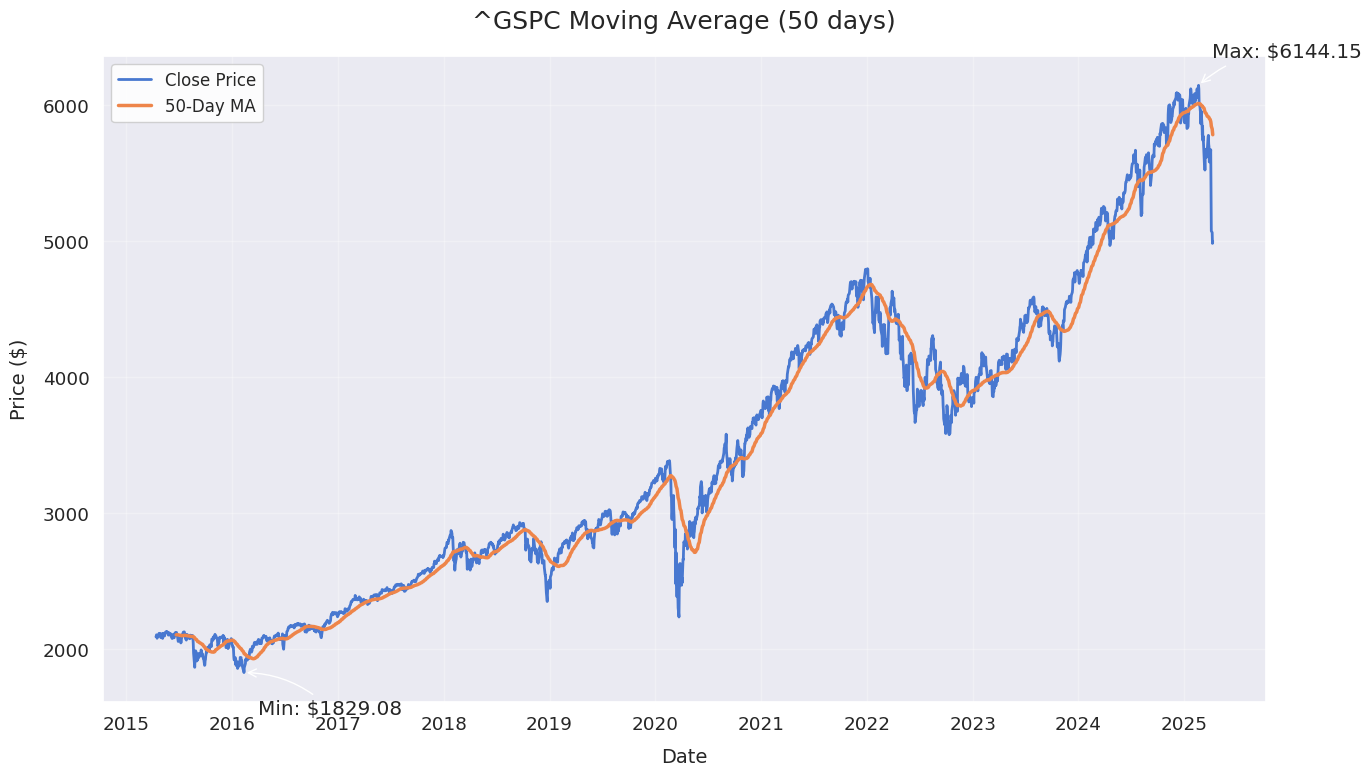

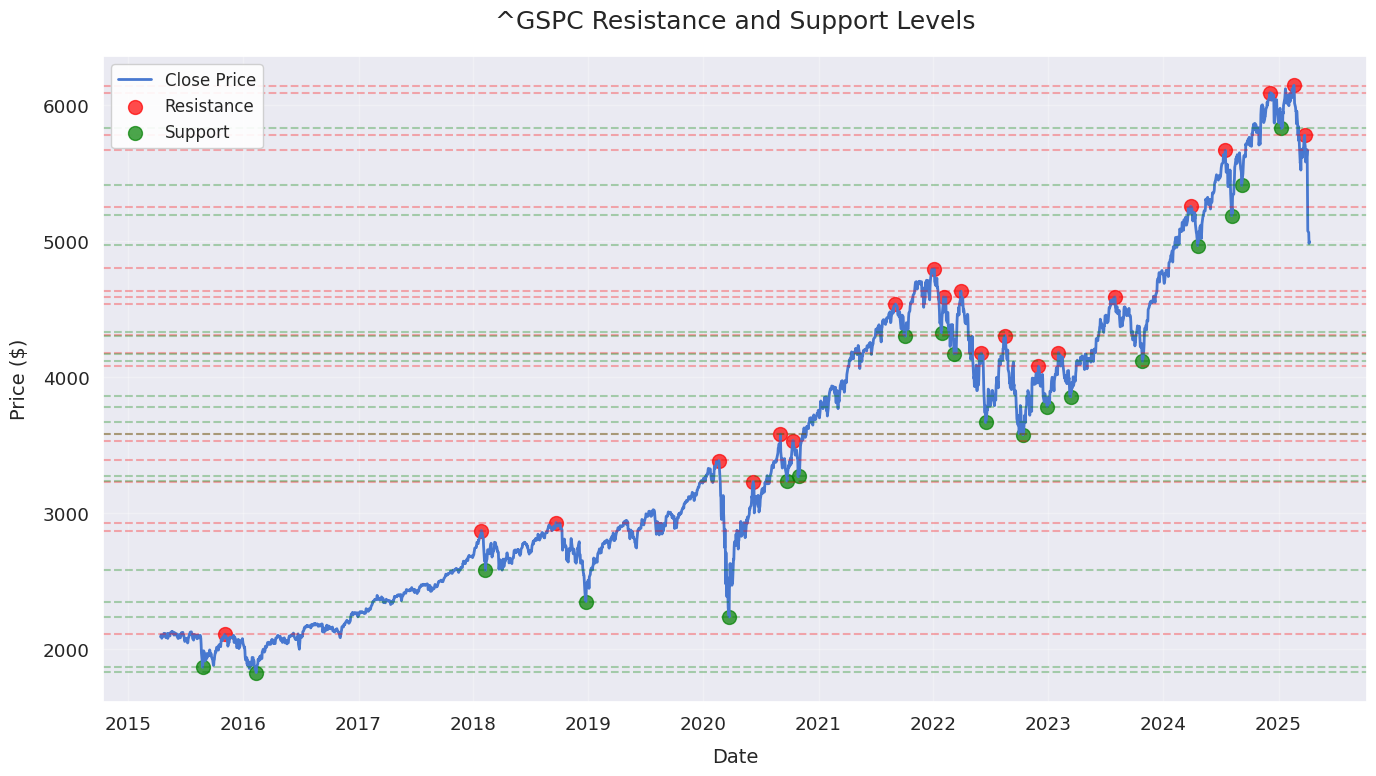

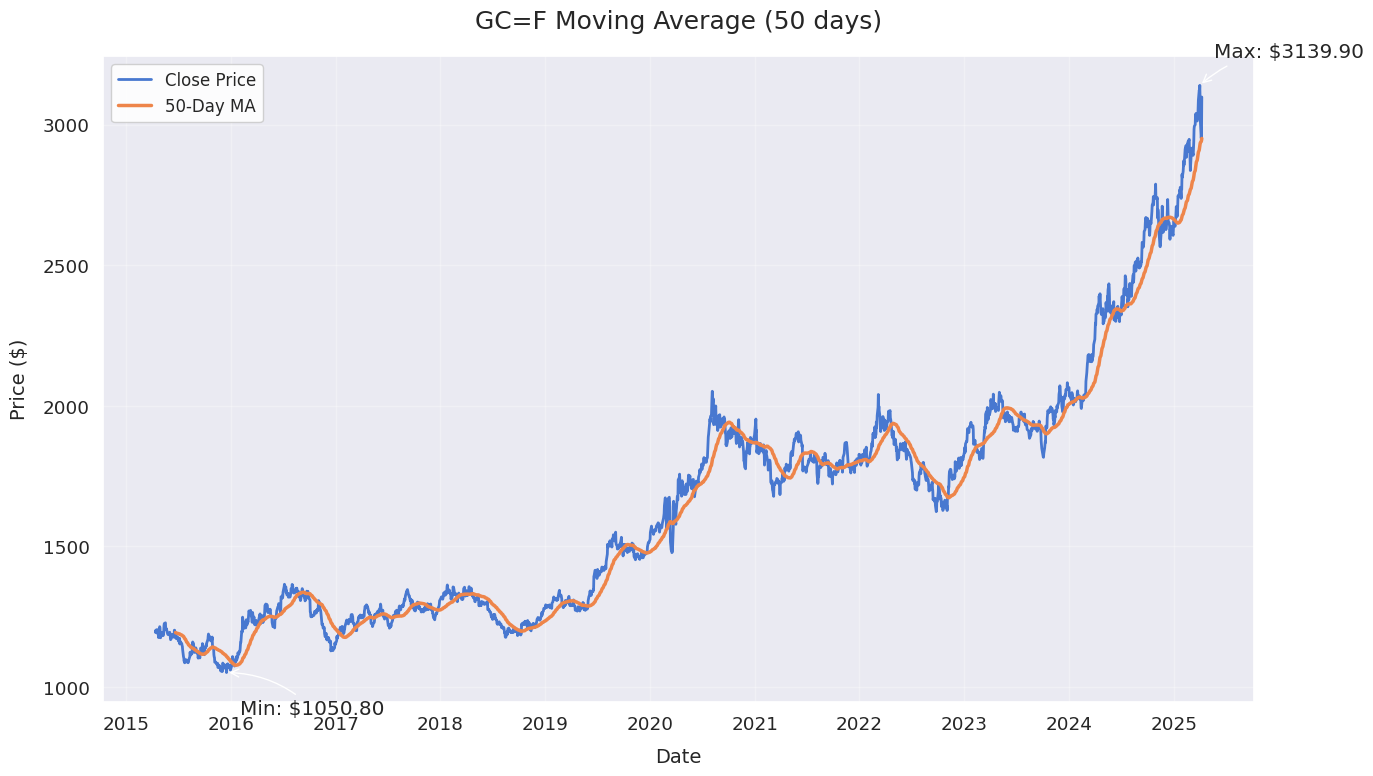

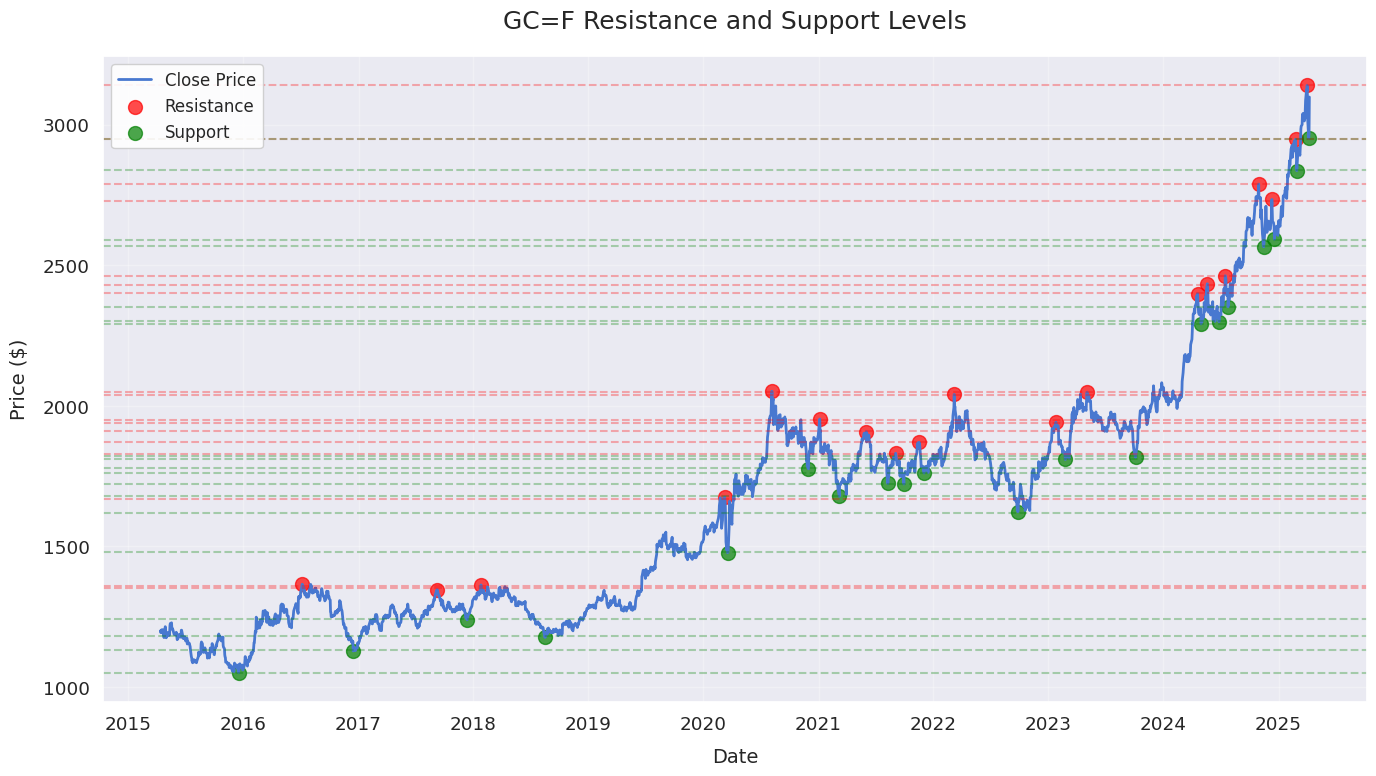

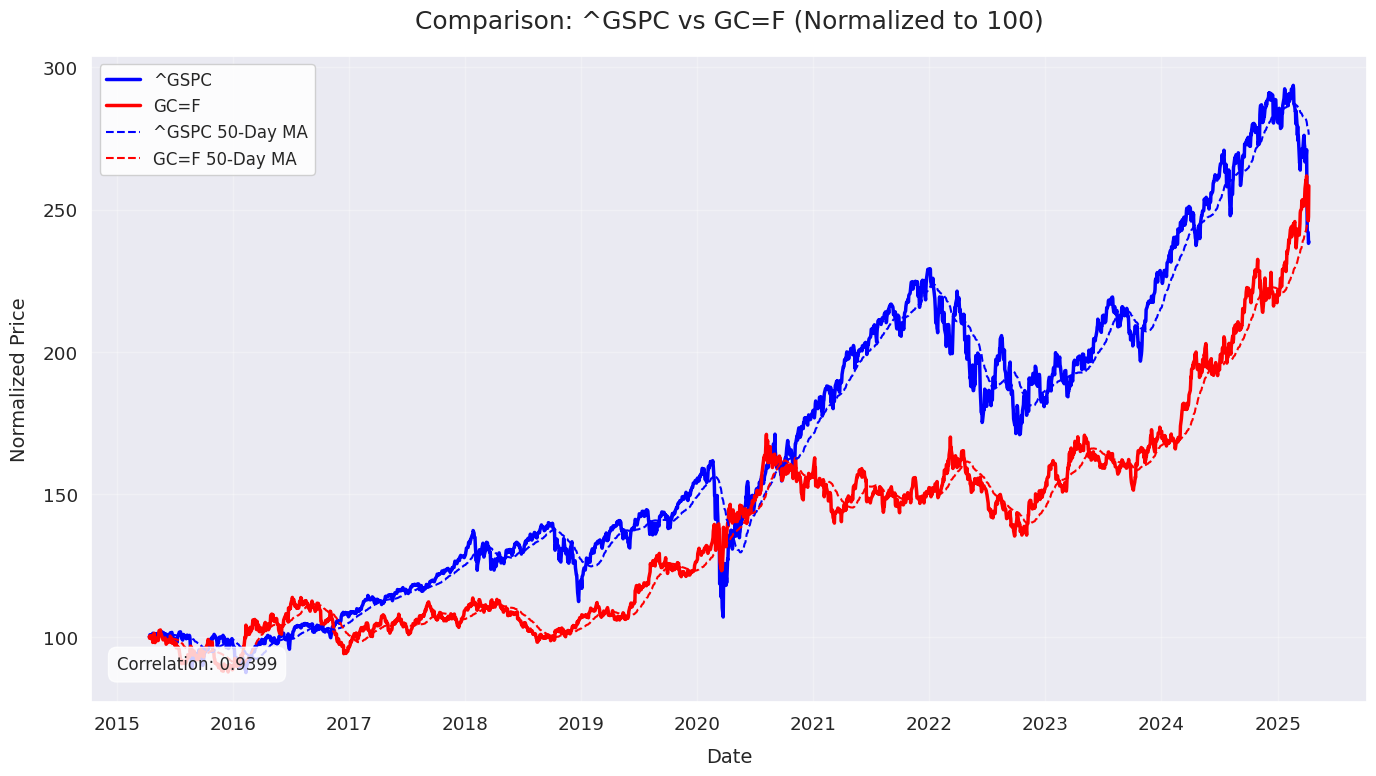

Correlation between S&P 500 and Gold: 0.9399


In [ ]:
class FinancialInstrument(Stock):

    def __init__(self, ticker, data):
        super().__init__(ticker, data)
        #keeping the seaborn graph theming consitent
        sns.set_theme(style="darkgrid", palette="muted", font_scale=1.2)

    def moving_average(self, window):
        """Window meaning current plotted point"""
        self.data['MA'] = self.data['Close'].rolling(window=window).mean()

        return self.data

    def plot_moving_average(self, window):
        """Plot closing price with moving average using seaborn"""
        self.moving_average(window)
        plt.figure(figsize=(14, 8))
        #moving the values stored in class into data cached in seaborn
        date_range = pd.to_datetime(self.data['Date'])

        # Plot with seaborn
        ax = sns.lineplot(x='Date', y='Close', data=self.data,
                         label='Close Price', linewidth=2)
        sns.lineplot(x='Date', y='MA', data=self.data,
                    label=f'{window}-Day MA', linewidth=2.5)

        #formatting the window and adding custom labels
        plt.title(f'{self.ticker} Moving Average ({window} days)', fontsize=18, pad=20)
        plt.xlabel('Date', fontsize=14, labelpad=10)
        plt.ylabel('Price ($)', fontsize=14, labelpad=10)
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=12, frameon=True, facecolor='white', framealpha=0.9)

        #using scipy max mins to for support boundries
        max_price = self.data['Close'].max()
        max_date = self.data.loc[self.data['Close'].idxmax(), 'Date']
        min_price = self.data['Close'].min()
        min_date = self.data.loc[self.data['Close'].idxmin(), 'Date']

        plt.annotate(f'Max: ${max_price:.2f}',
                     xy=(pd.to_datetime(max_date), max_price),
                     xytext=(10, 20), textcoords='offset points',
                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

        plt.annotate(f'Min: ${min_price:.2f}',
                     xy=(pd.to_datetime(min_date), min_price),
                     xytext=(10, -30), textcoords='offset points',
                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

        plt.tight_layout()
        plt.show()

    def resistance_support(self, window=20, prominence=0.05):
        """Using this function creates some support levels visualised on the graph"""

        #once again moving data from old class into new class as list
        prices = self.data['Close'].values
        dates = pd.to_datetime(self.data['Date'])

        #norm will be calculated as the differance of each point subtracted by the lowest divided by the range of prices
        norm_prices = (prices - np.min(prices)) / (np.max(prices) - np.min(prices))
        resistance_idx, _ = find_peaks(norm_prices, distance=window, prominence=prominence)
        support_idx, _ = find_peaks(-norm_prices, distance=window, prominence=prominence)
        #using a library for this process since im awful at math

        #storing the caluations from scipy
        resistance_levels = prices[resistance_idx]
        support_levels = prices[support_idx]
        resistance_dates = dates[resistance_idx]
        support_dates = dates[support_idx]


        plt.figure(figsize=(14, 8))

        sns.lineplot(x=dates, y=prices, label='Close Price', linewidth=2)
        #Adding promonent points to the local maxes and mins
        plt.scatter(resistance_dates, resistance_levels, color='red', s=100, alpha=0.7, label='Resistance')
        #Same process for the mins
        plt.scatter(support_dates, support_levels, color='green', s=100, alpha=0.7, label='Support')

        #Draw horizontal lines for major resistance/support zones
        if len(resistance_levels) > 0:
            for level in set([round(x, -1) for x in resistance_levels]):
                plt.axhline(y=level, color='red', linestyle='--', alpha=0.3)

        if len(support_levels) > 0:
            for level in set([round(x, -1) for x in support_levels]):
                plt.axhline(y=level, color='green', linestyle='--', alpha=0.3)

        #I made ai relabel this since it looked bad
        plt.title(f'{self.ticker} Resistance and Support Levels', fontsize=18, pad=20)
        plt.xlabel('Date', fontsize=14, labelpad=10)
        plt.ylabel('Price ($)', fontsize=14, labelpad=10)
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=12, frameon=True, facecolor='white', framealpha=0.9)

        plt.tight_layout()
        plt.show()

        #creates a dictionary of resistance and support points
        return {'resistance': list(zip(resistance_dates, resistance_levels)),
                'support': list(zip(support_dates, support_levels))}

    def compare_with(self, other_instrument, window=50):
        """allows plotting of 2 tickers"""
        #Create a 2 graphed functions on one plot
        fig, ax1 = plt.subplots(figsize=(14, 8))

        #calling func from before
        self.moving_average(window)
        other_instrument.moving_average(window)

        #100 is a total amount, differances are denoted as changes to this "whole"
        self_norm = 100 * (self.data['Close'] / self.data['Close'].iloc[0])
        other_norm = 100 * (other_instrument.data['Close'] / other_instrument.data['Close'].iloc[0])

        #Plot on the same axes
        sns.lineplot(x=self.data['Date'], y=self_norm,
                    label=f'{self.ticker}', ax=ax1, linewidth=2.5, color='blue')
        sns.lineplot(x=other_instrument.data['Date'], y=other_norm,
                    label=f'{other_instrument.ticker}', ax=ax1, linewidth=2.5, color='red')

        #Add moving averages
        self_ma_norm = 100 * (self.data['MA'] / self.data['Close'].iloc[0])
        other_ma_norm = 100 * (other_instrument.data['MA'] / other_instrument.data['Close'].iloc[0])

        sns.lineplot(x=self.data['Date'], y=self_ma_norm,
                    label=f'{self.ticker} {window}-Day MA', ax=ax1,
                    linewidth=1.5, color='blue', linestyle='--')
        sns.lineplot(x=other_instrument.data['Date'], y=other_ma_norm,
                    label=f'{other_instrument.ticker} {window}-Day MA', ax=ax1,
                    linewidth=1.5, color='red', linestyle='--')

        #stats formulas for correlation
        self_dates = set(pd.to_datetime(self.data['Date']).dt.date)
        other_dates = set(pd.to_datetime(other_instrument.data['Date']).dt.date)
        common_dates = self_dates.intersection(other_dates)

        #make sure the price data shares a date
        self_filtered = self.data[pd.to_datetime(self.data['Date']).dt.date.isin(common_dates)]
        other_filtered = other_instrument.data[pd.to_datetime(other_instrument.data['Date']).dt.date.isin(common_dates)]

        #sorting by date
        self_filtered = self_filtered.sort_values('Date')
        other_filtered = other_filtered.sort_values('Date')

        #doing the correlation calc
        correlation = np.corrcoef(self_filtered['Close'], other_filtered['Close'])[0, 1]

        #I told gpt to make this graph layout since im bad at it
        plt.title(f'Comparison: {self.ticker} vs {other_instrument.ticker} (Normalized to 100)',
                 fontsize=18, pad=20)
        plt.xlabel('Date', fontsize=14, labelpad=10)
        plt.ylabel('Normalized Price', fontsize=14, labelpad=10)
        plt.grid(True, alpha=0.3)

        #same part here
        plt.annotate(f'Correlation: {correlation:.4f}',
                     xy=(0.02, 0.05), xycoords='axes fraction',
                     bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8),
                     fontsize=12)

        #changing some settings
        plt.legend(fontsize=12, frameon=True, facecolor='white', framealpha=0.9)

        plt.tight_layout()
        plt.show()

        return correlation


#Testing the function
sp500 = FinancialInstrument.follow_ticker("^GSPC", 10)  # Get 10 years of S&P 500 data
gold = FinancialInstrument.follow_ticker("GC=F", 10)    # Get 10 years of Gold Futures data

#Testing both functions
sp500.plot_moving_average(50)
sp500.resistance_support()

gold.plot_moving_average(50)
gold.resistance_support()

#Compare S&P 500 and Gold
correlation = sp500.compare_with(gold, window=50)
print(f"Correlation between S&P 500 and Gold: {correlation:.4f}")
#'''

Due to my inexperiance with linear algebra, I will be using the support and resistance point stratagies to do some "pseduo futures" trades.

However, I did not use the actual futures trading formula


 **The real formula (cost of carrying)**

  ***F = Se ^ ((r + s - c) × t)***
  

  Where:

    F = the future price of the commodity
    S = the spot price of the commodity
    e = the base of natural logs, approximated as 2.718
    r = the risk-free interest rate
    s = the storage cost, expressed as a percentage of the spot price
    c = the convenience yield
    t = time to delivery of the contract, expressed as a fraction of one year
    


# *My formula*
# *P/L = n(Pf - p0) - f*

    P/L = profit or loss
    n = Number of shares
    p0 = Entry price
    pf = Exit price
    f = Trading fees


I made a simplified formula since i made a mistake in my research, The steps of this takes is in this order:


1.   Create a dictonary account
1.   inherit data made by old class
2.   start in timeframe - 50 days
2.   create support and resistance boundries in real time and open orderes when price apporches them again




# **Ways to improve this project**
this is just a section to talking about the flaws of my code and ways to possibly improve it if i had more time,

*   Using a boolean for long and short positions meaning i could save and duplicating the dictionary, true for long and false for short, for example
*   using a composite class in the second class instead of inheriting my first one
*   creating a backtest function to adjust the take profit and stop loss to make this profitable

[*********************100%***********************]  1 of 1 completed


Starting auto-trading for AAPL
Initial balance: $1000
Take profit: 3.0%
Stop loss: 2.0%
OPENED SHORT at $249.52 - 2024-12-19


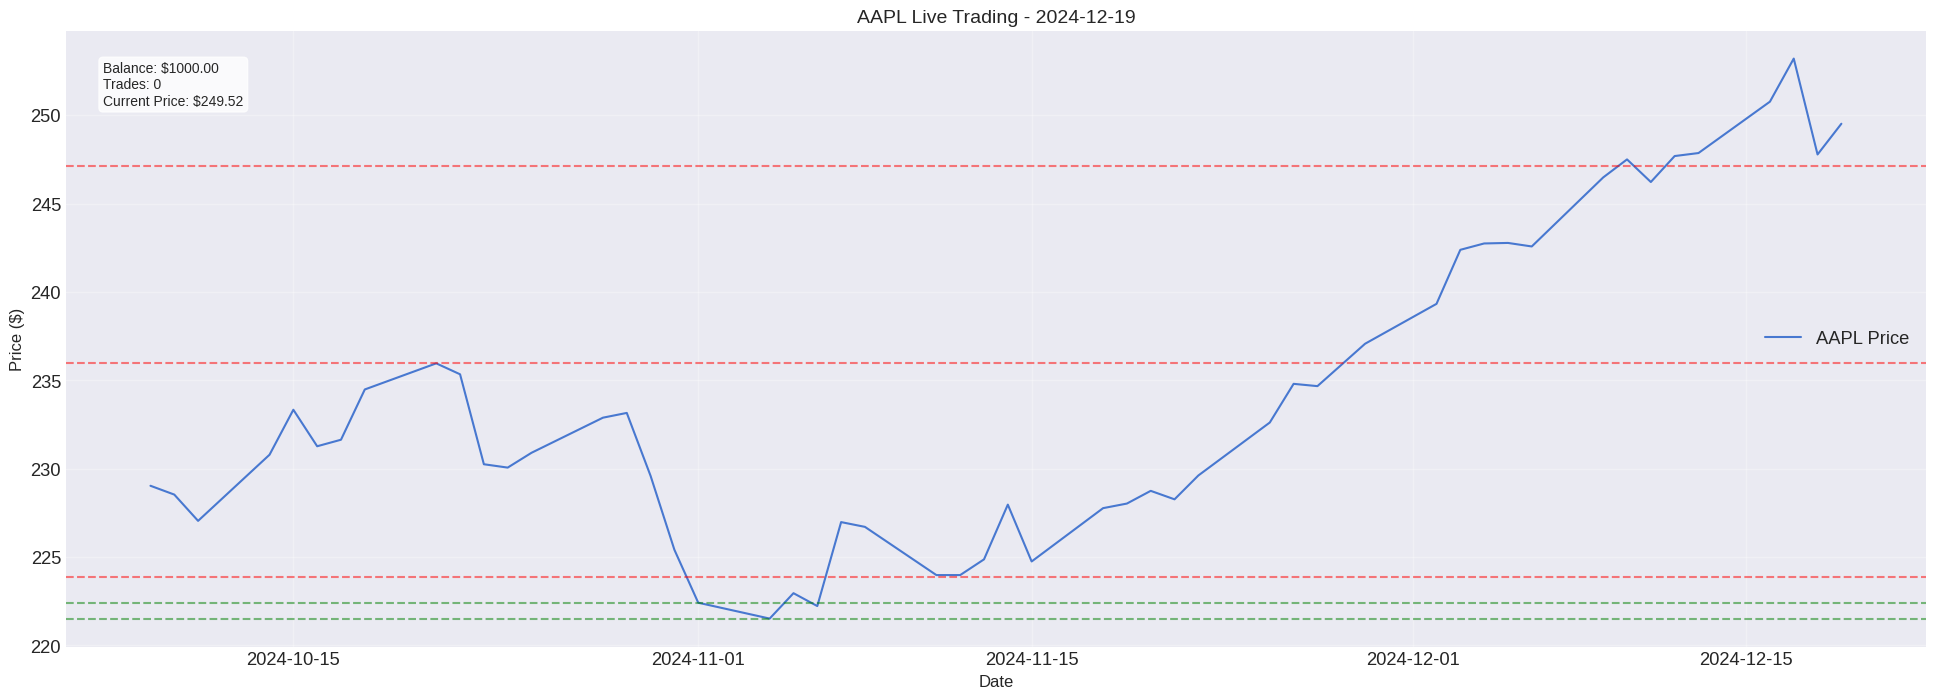

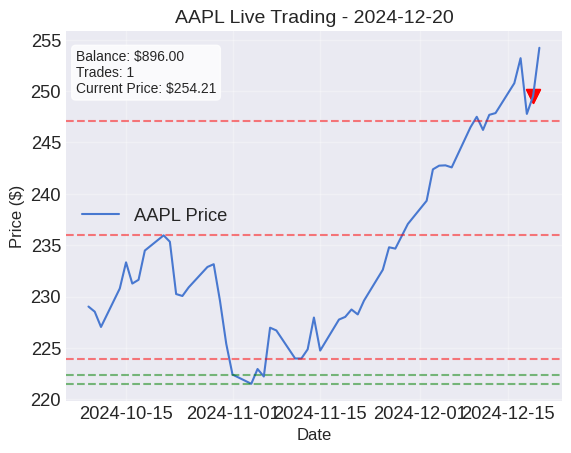

CLOSED SHORT at $254.99 - 2024-12-23 - LOSS: $-10.19 (stop_loss)


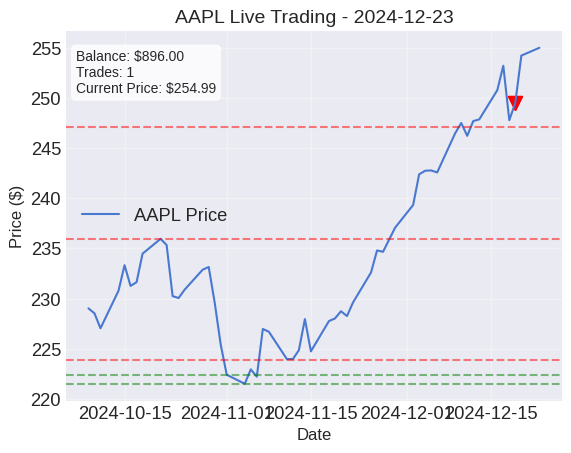

OPENED SHORT at $257.92 - 2024-12-24


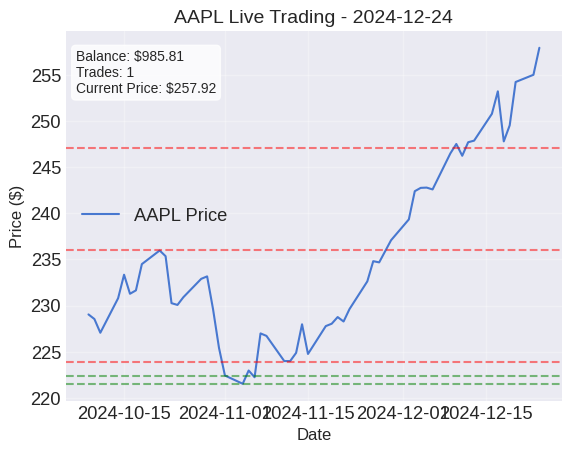

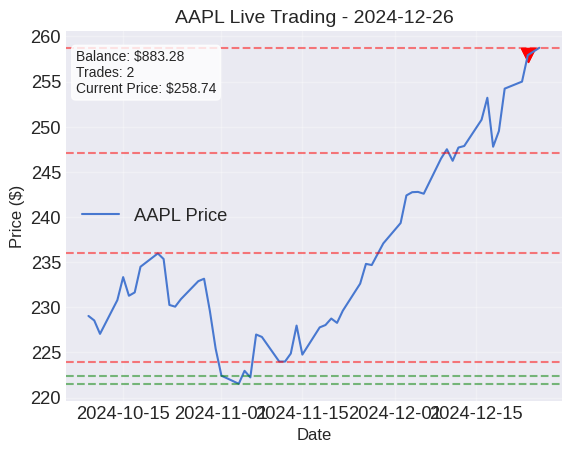

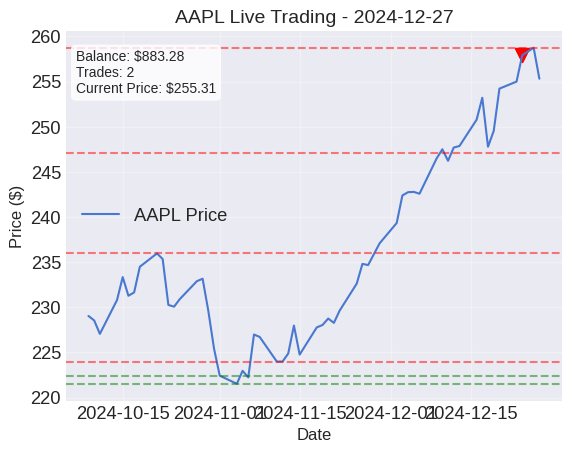

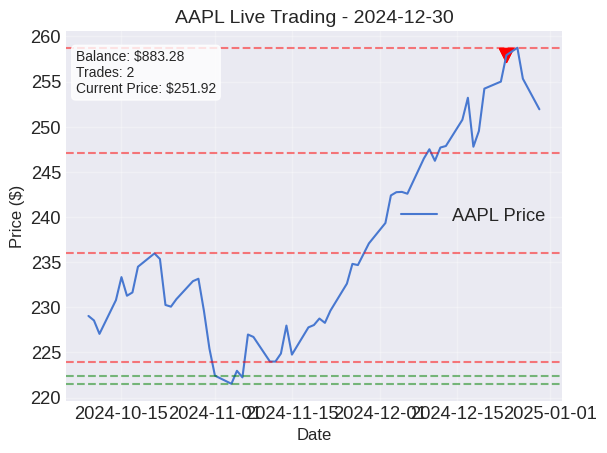

CLOSED SHORT at $250.14 - 2024-12-31 - LOSS: $-4.92 (take_profit)


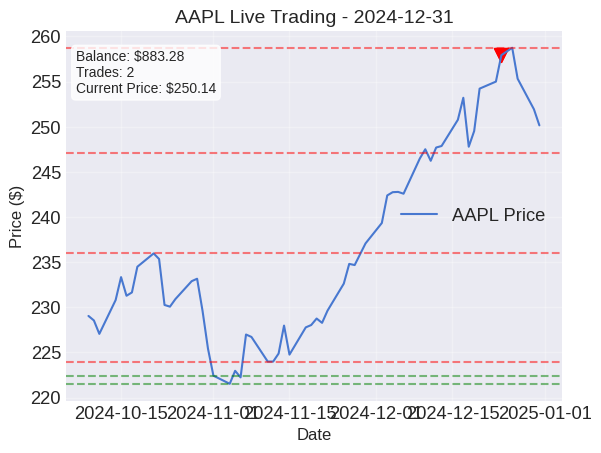

OPENED SHORT at $243.58 - 2025-01-02


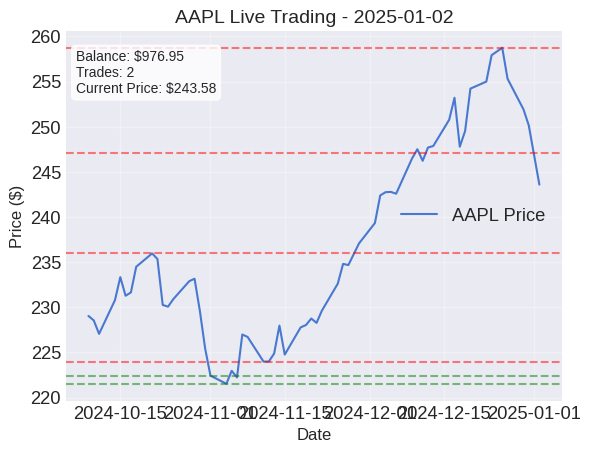

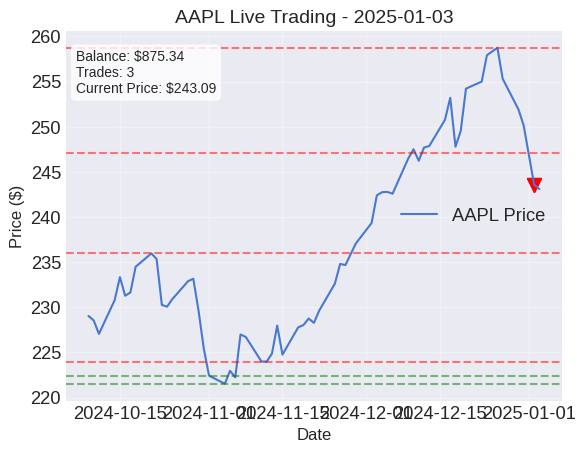

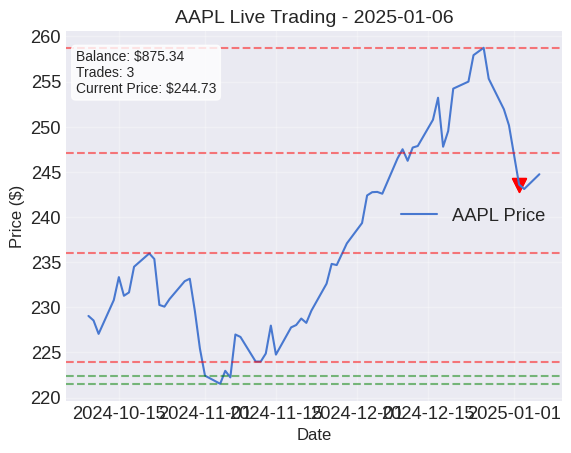

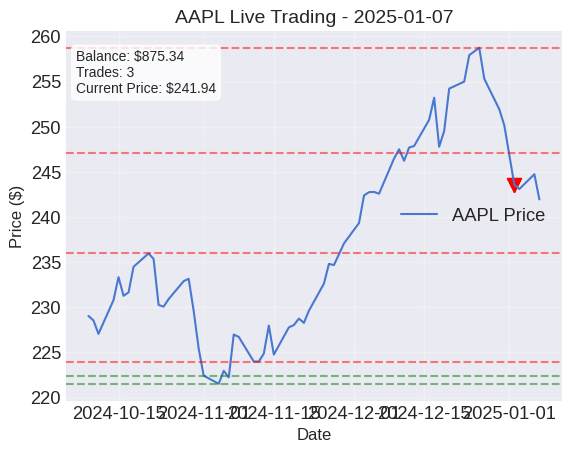

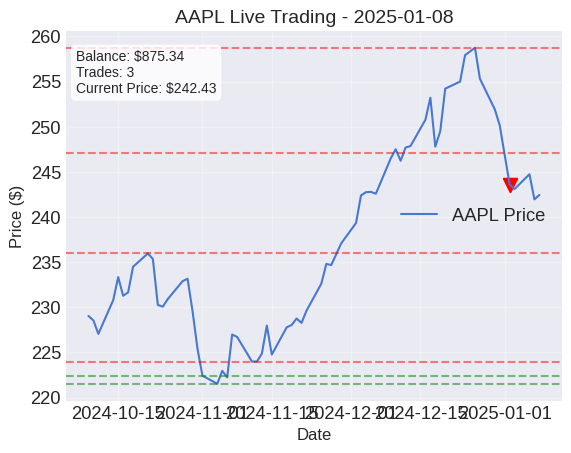

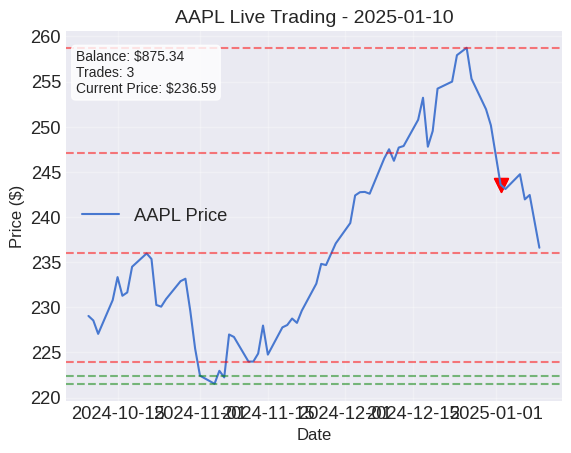

CLOSED SHORT at $234.14 - 2025-01-13 - LOSS: $-4.03 (take_profit)


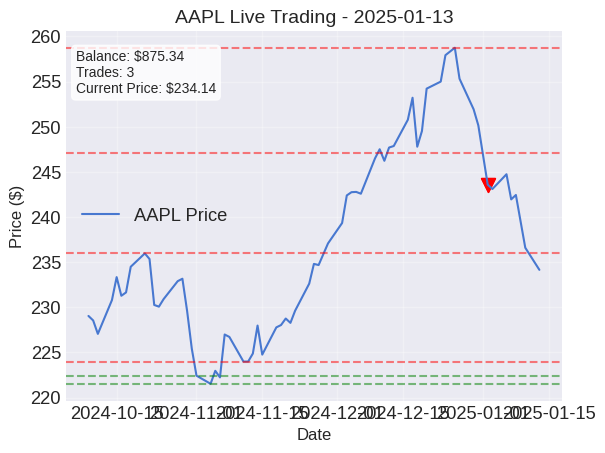

OPENED SHORT at $233.02 - 2025-01-14


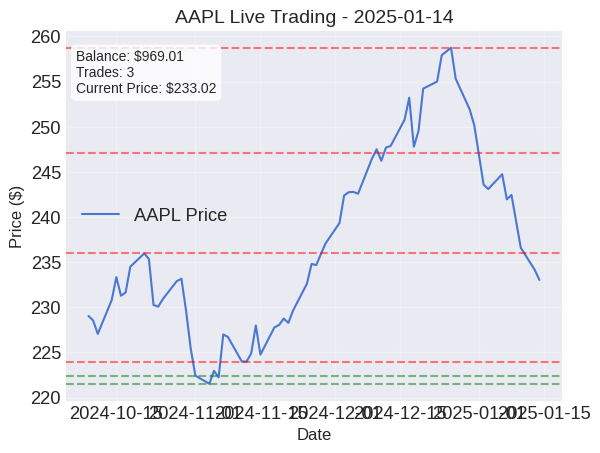

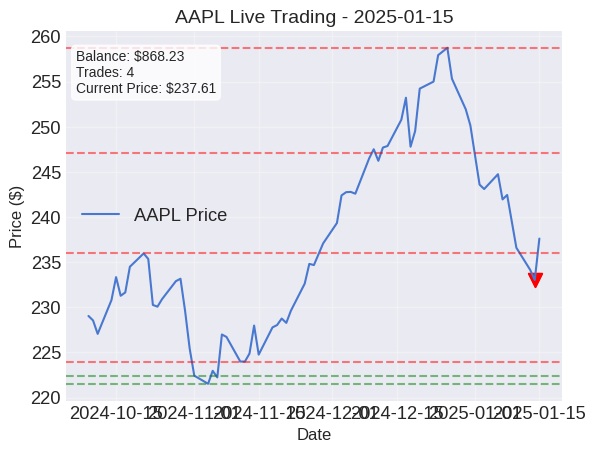

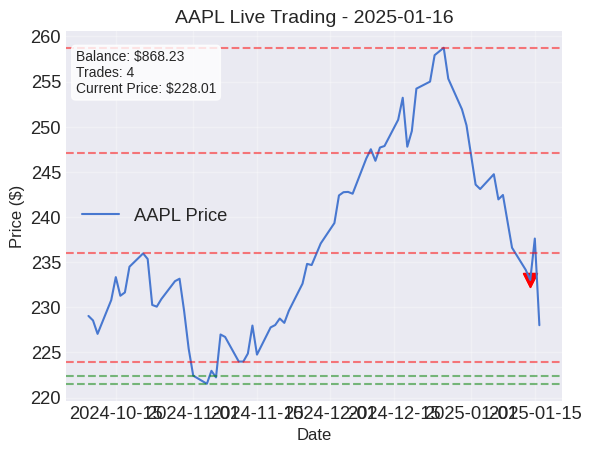

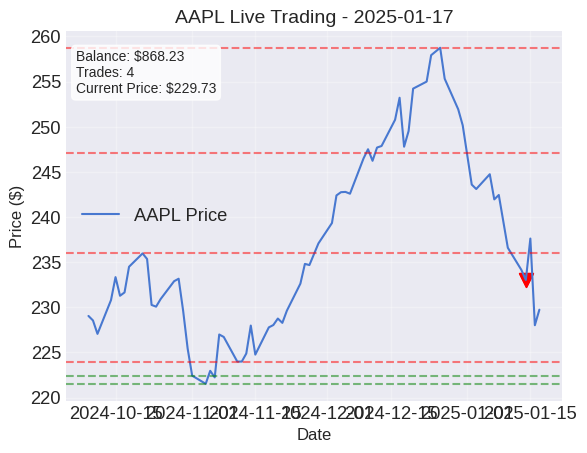

CLOSED SHORT at $222.40 - 2025-01-21 - LOSS: $-3.33 (take_profit)


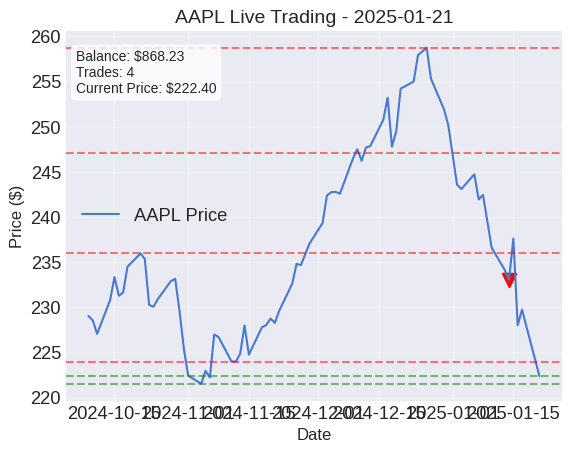

OPENED LONG at $223.58 - 2025-01-22


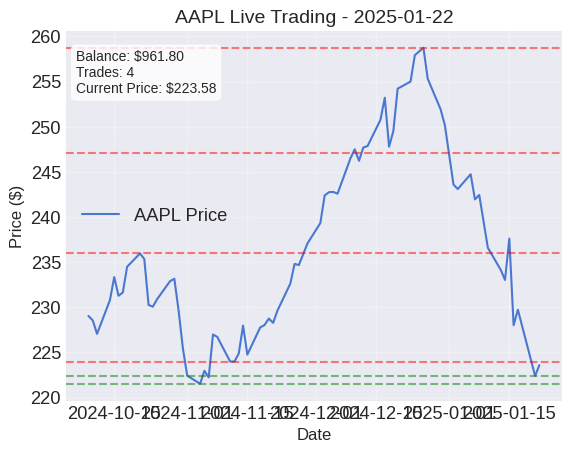

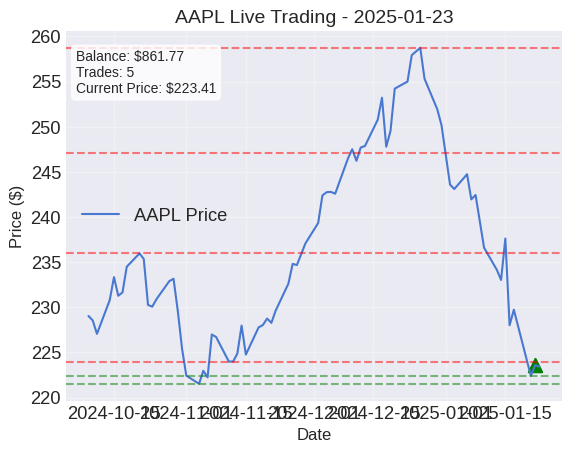

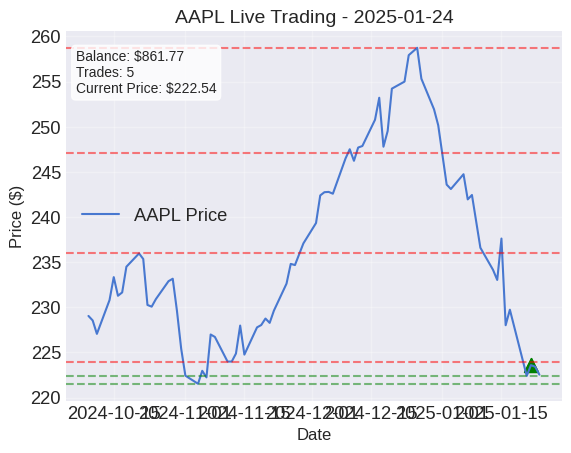

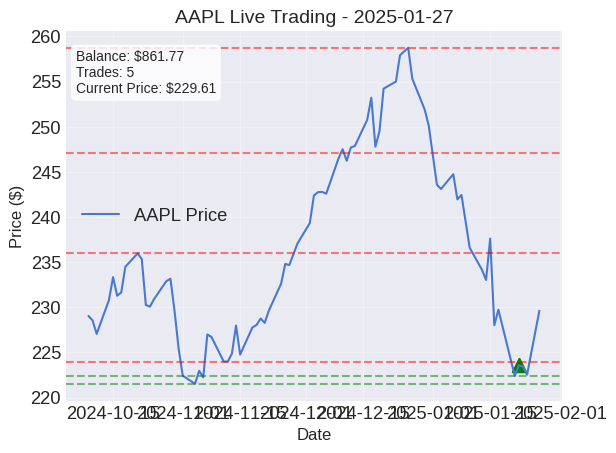

CLOSED LONG at $238.00 - 2025-01-28 - LOSS: $-1.49 (take_profit)


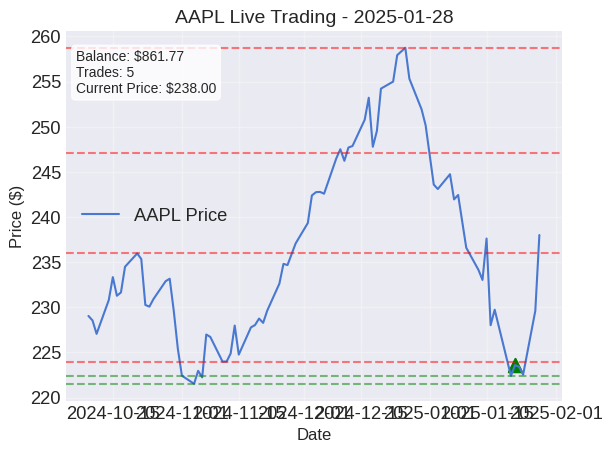

OPENED SHORT at $239.10 - 2025-01-29


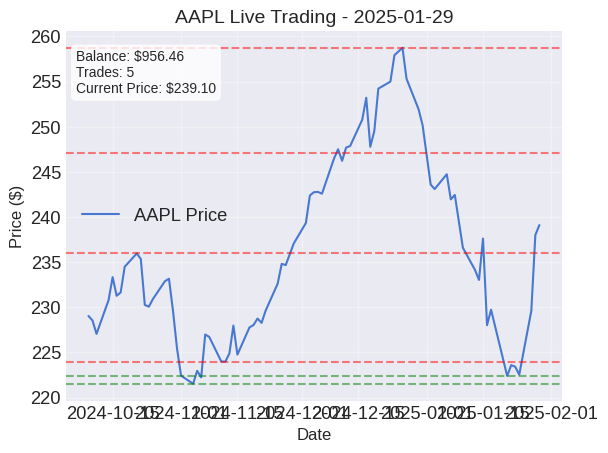

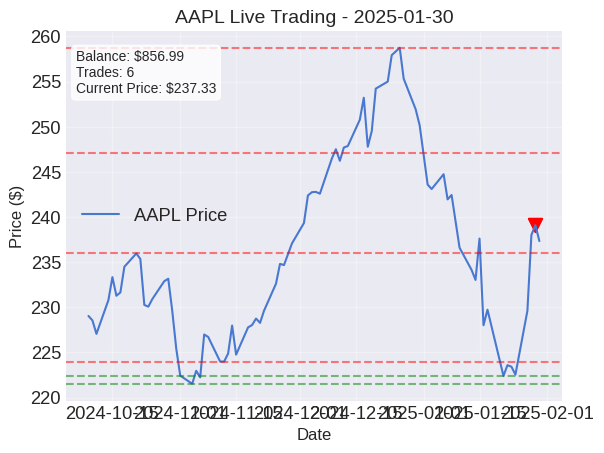

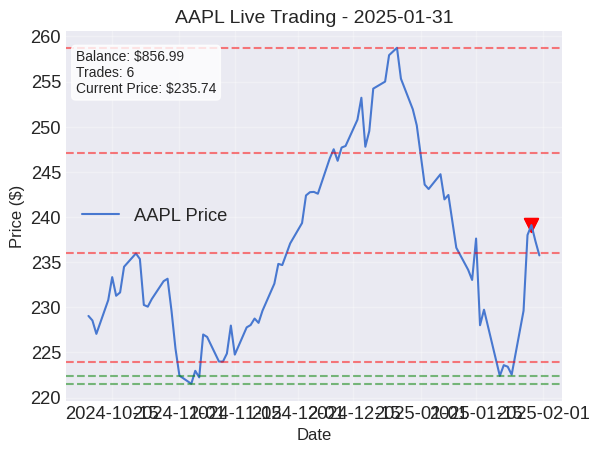

CLOSED SHORT at $227.76 - 2025-02-03 - LOSS: $-3.12 (take_profit)


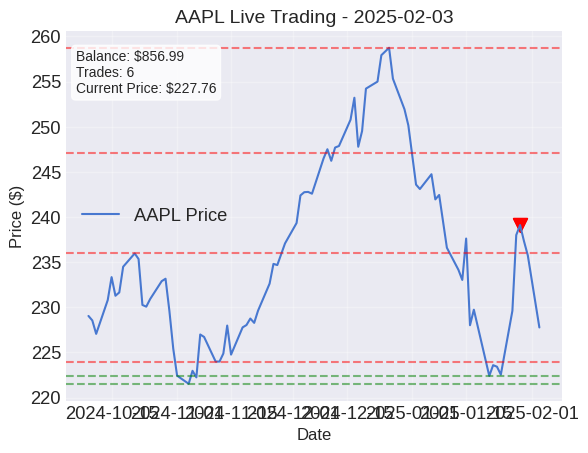

OPENED SHORT at $232.54 - 2025-02-04


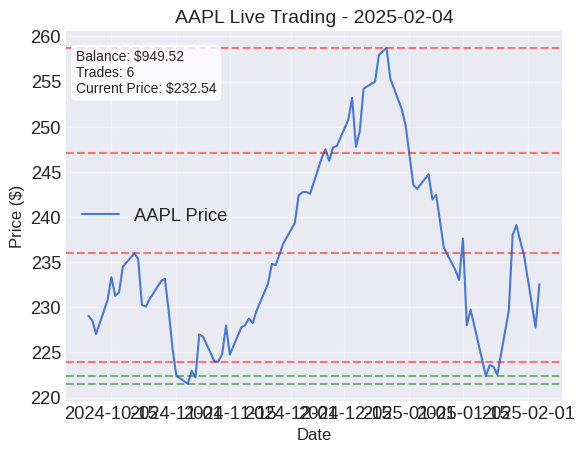

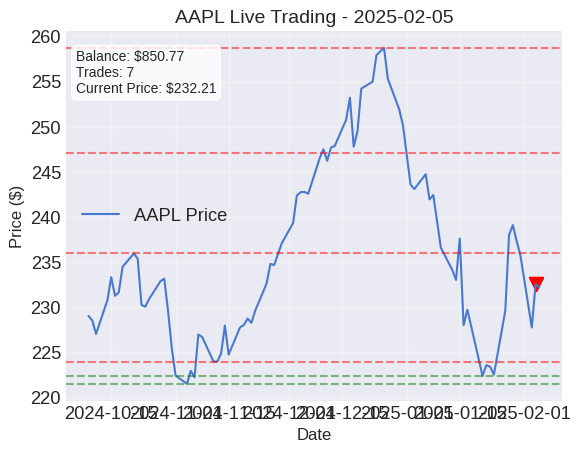

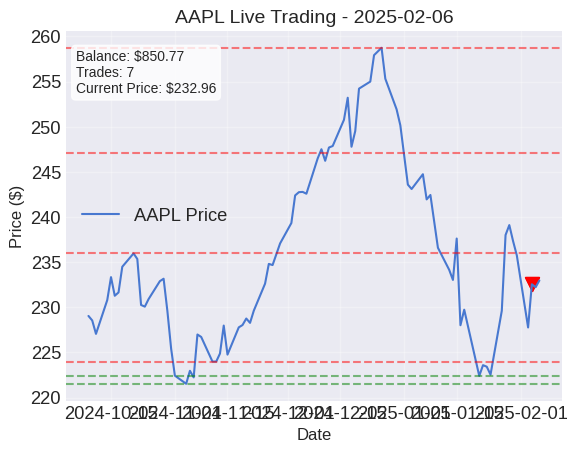

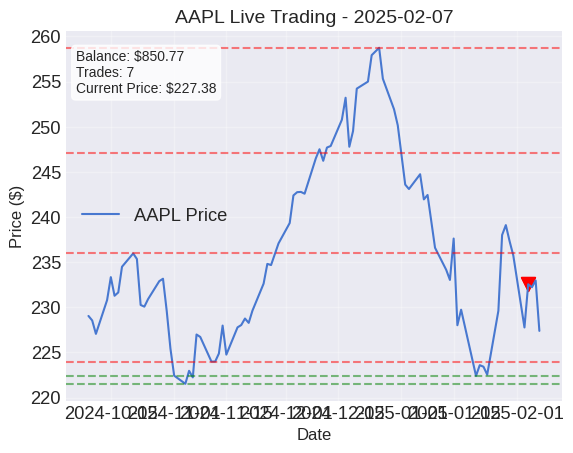

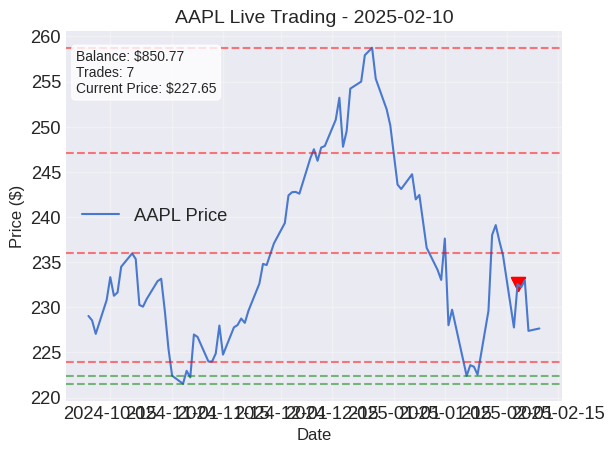

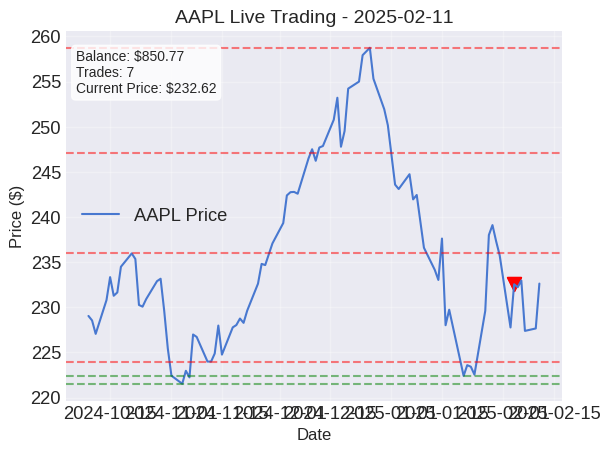

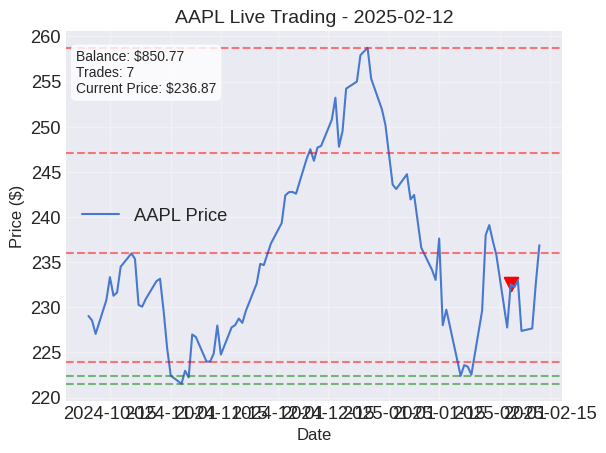

CLOSED SHORT at $241.53 - 2025-02-13 - LOSS: $-11.27 (stop_loss)


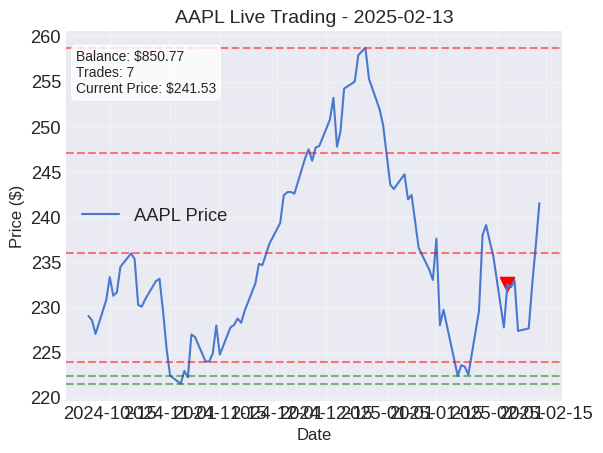

OPENED SHORT at $244.60 - 2025-02-14


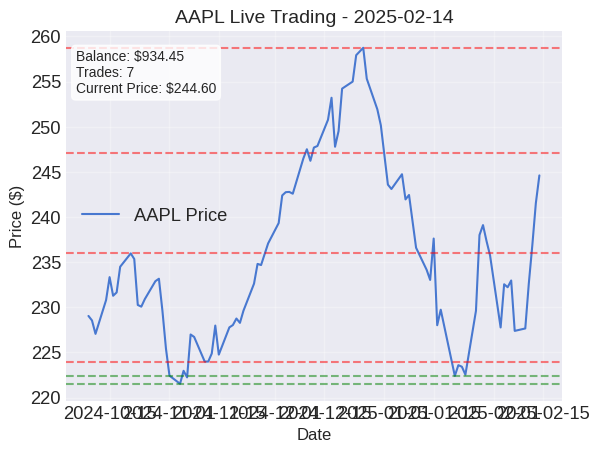

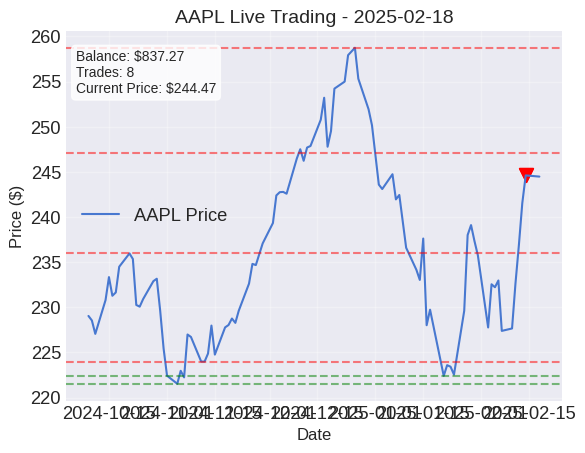

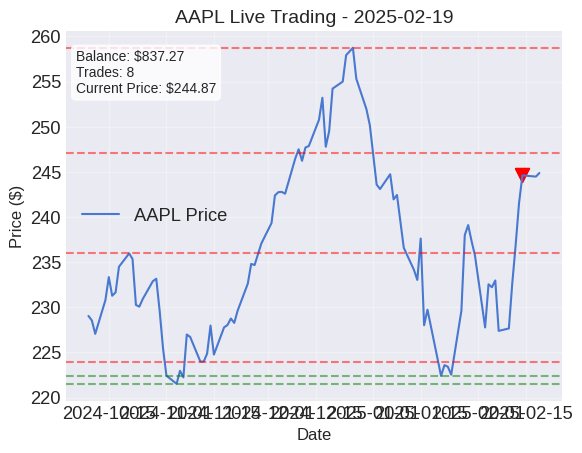

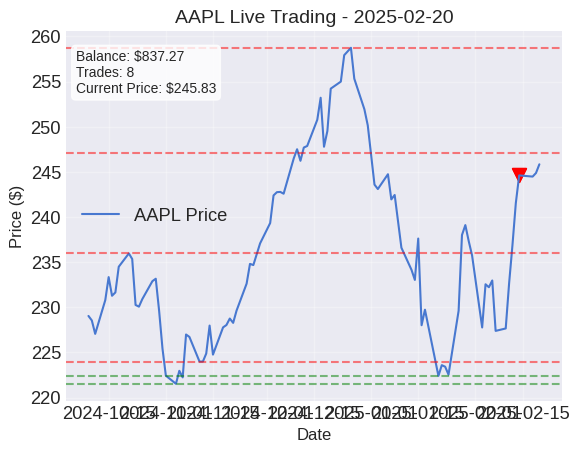

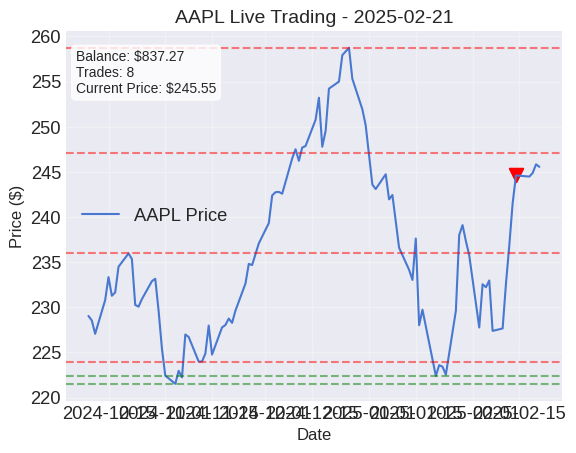

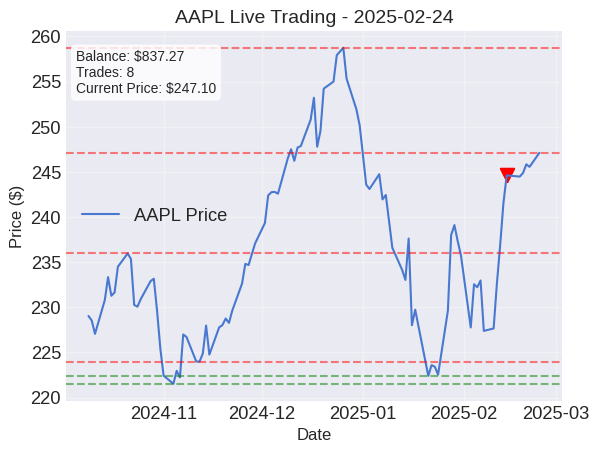

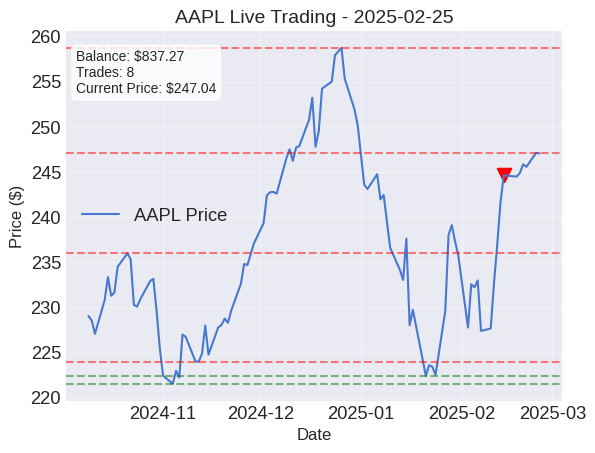

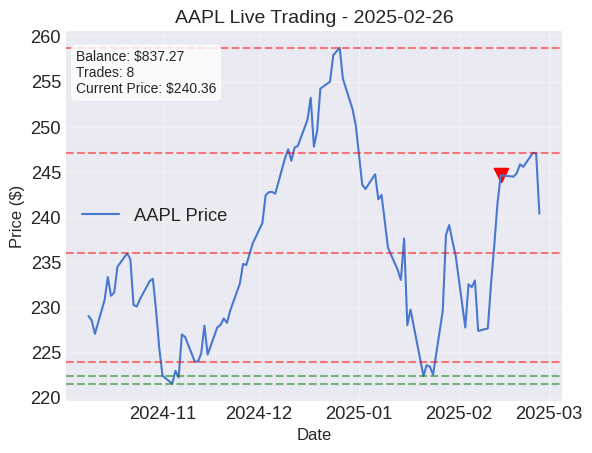

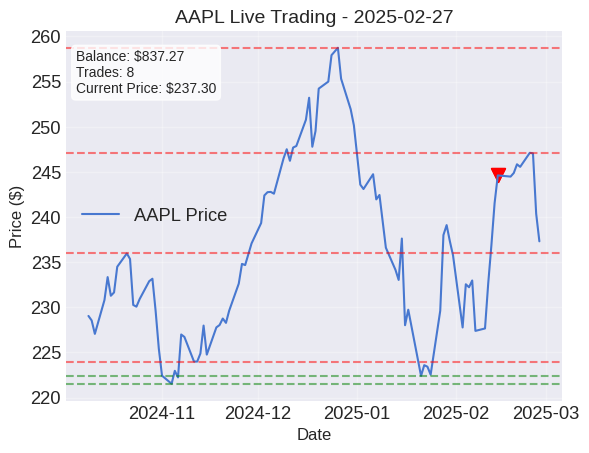

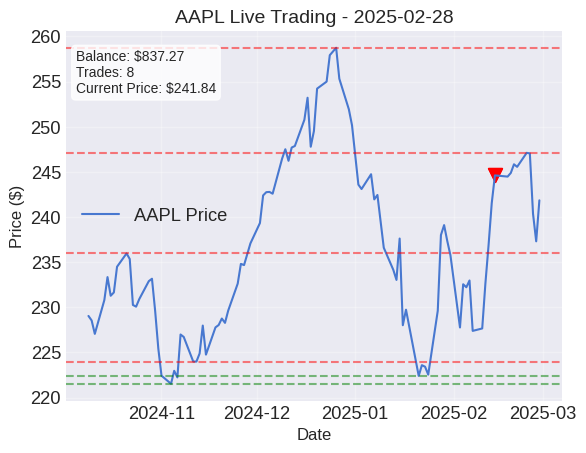

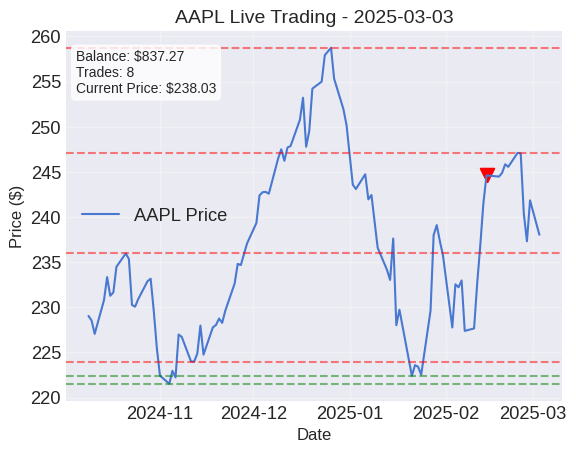

CLOSED SHORT at $235.93 - 2025-03-04 - LOSS: $-4.16 (take_profit)


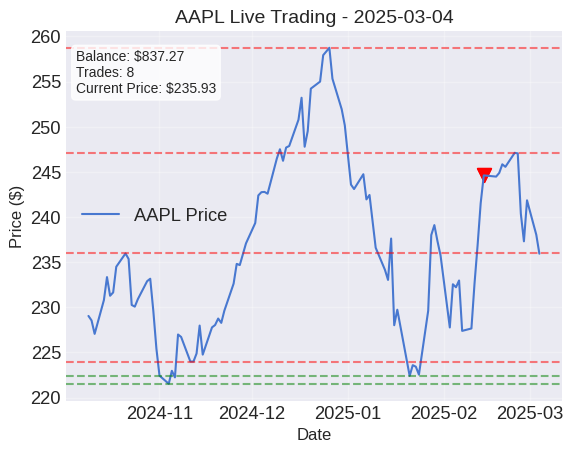

OPENED SHORT at $235.74 - 2025-03-05


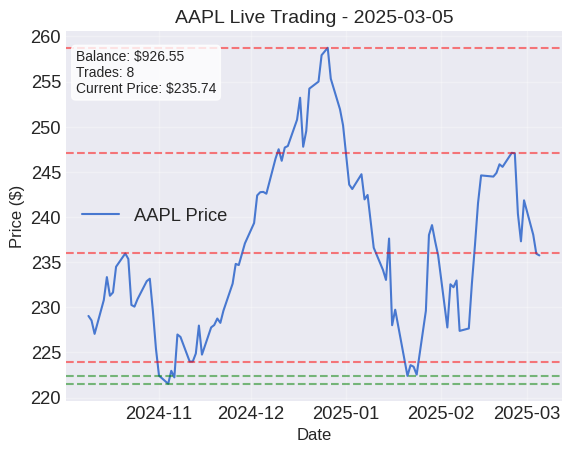

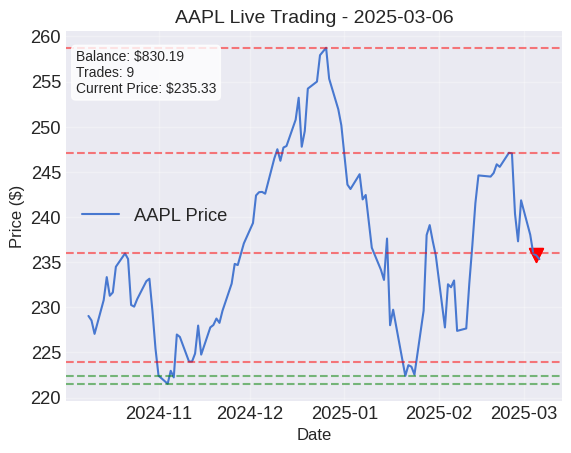

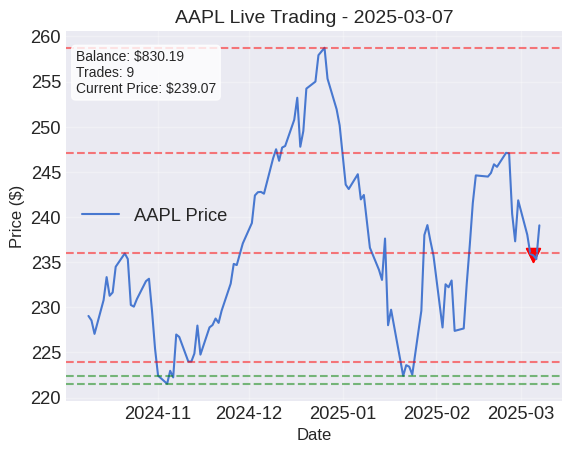

CLOSED SHORT at $227.48 - 2025-03-10 - LOSS: $-4.17 (take_profit)


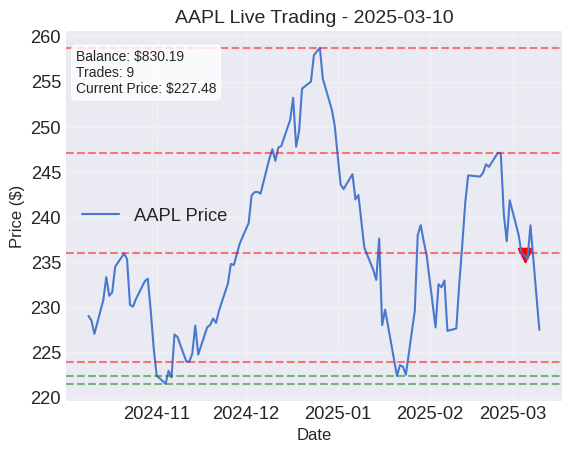

OPENED LONG at $220.84 - 2025-03-11


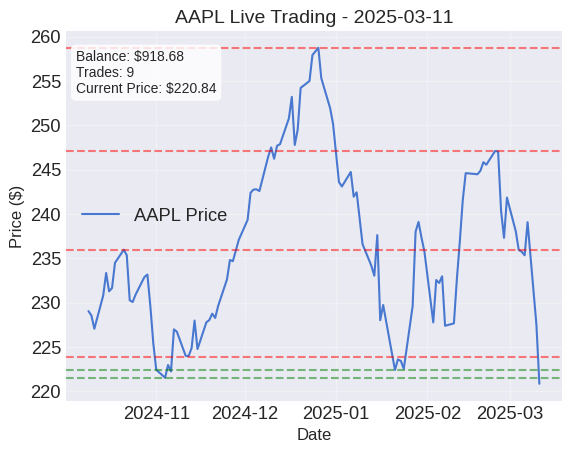

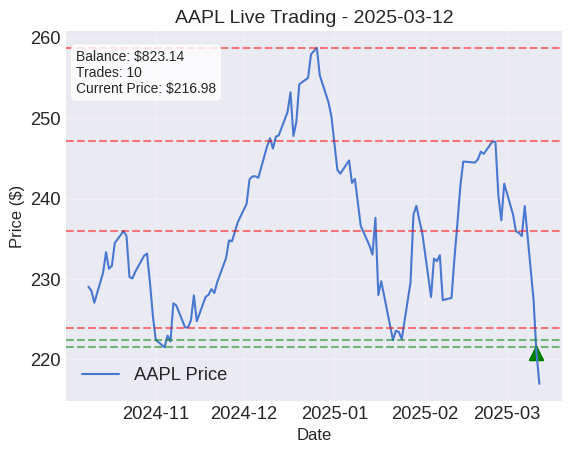

CLOSED LONG at $209.68 - 2025-03-13 - LOSS: $-11.99 (stop_loss)


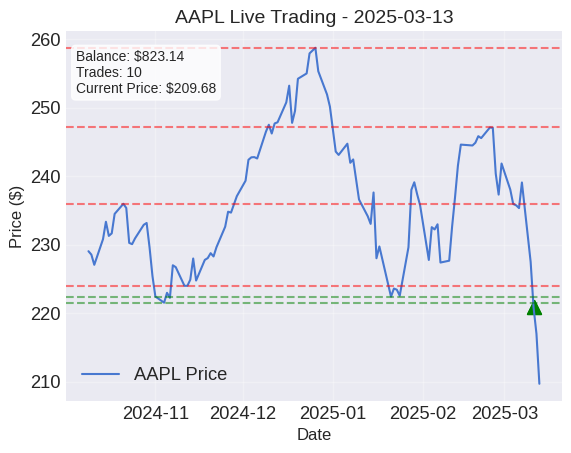

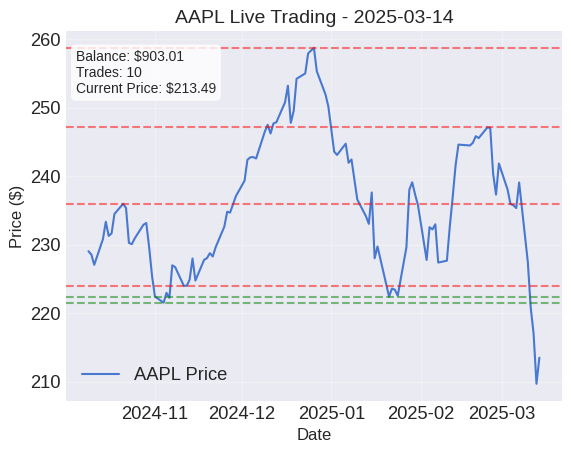

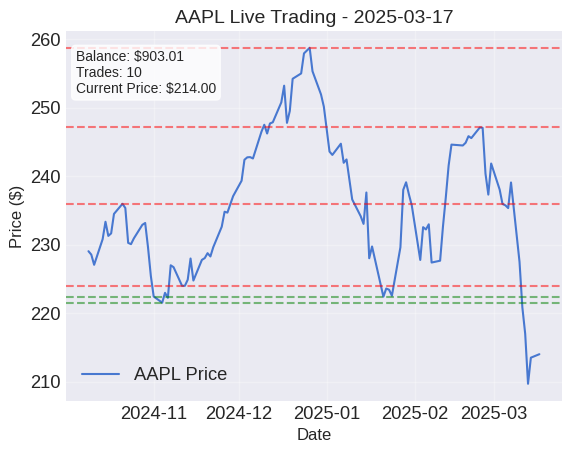

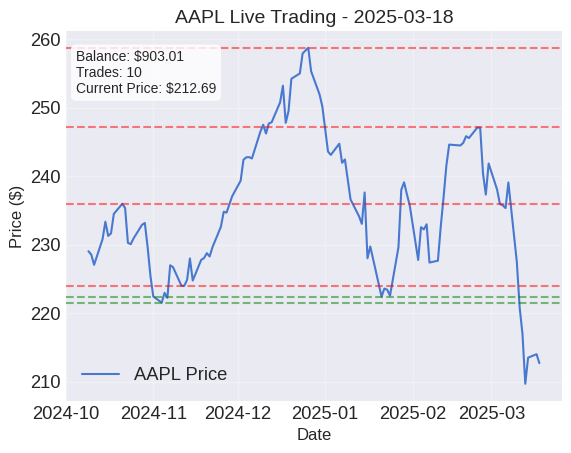

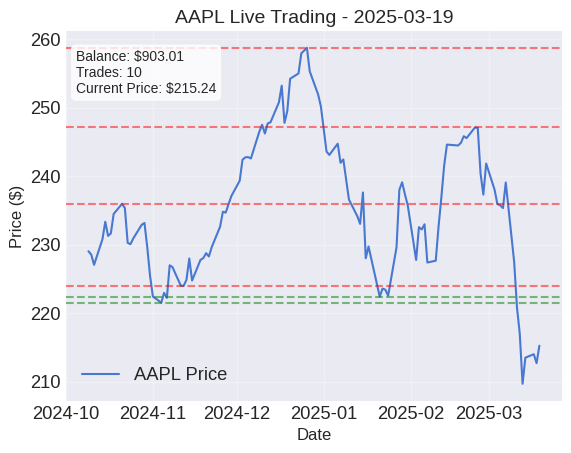

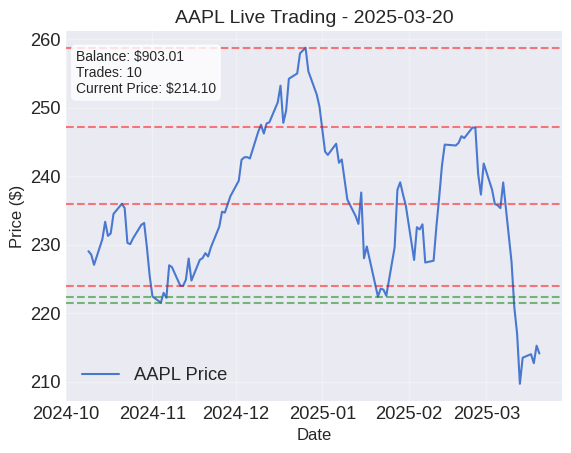

OPENED LONG at $218.27 - 2025-03-21


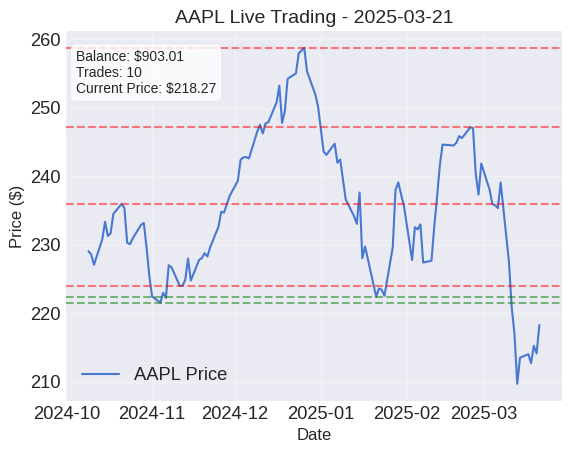

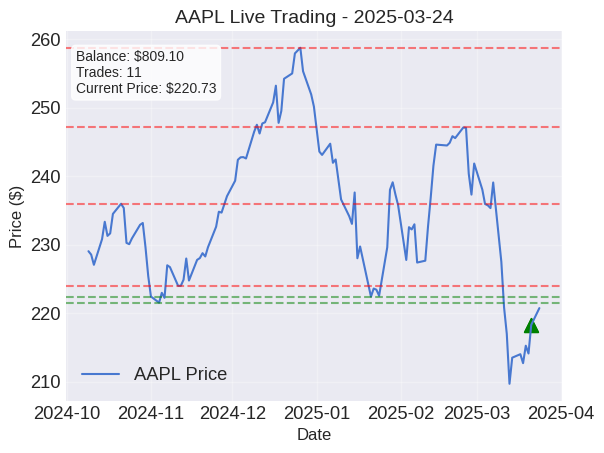

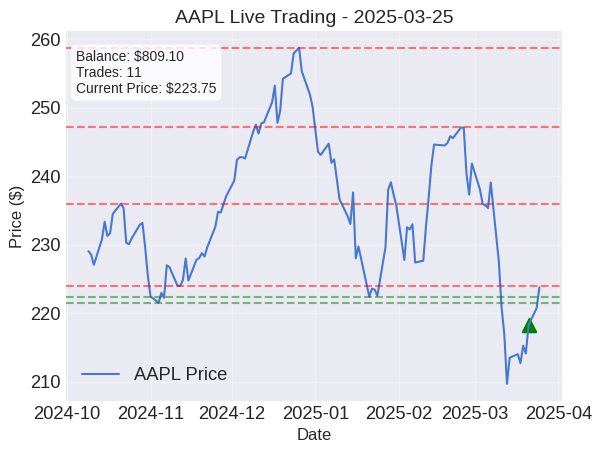

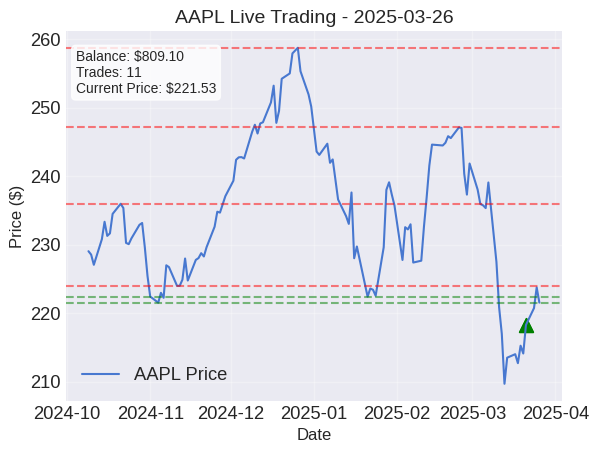

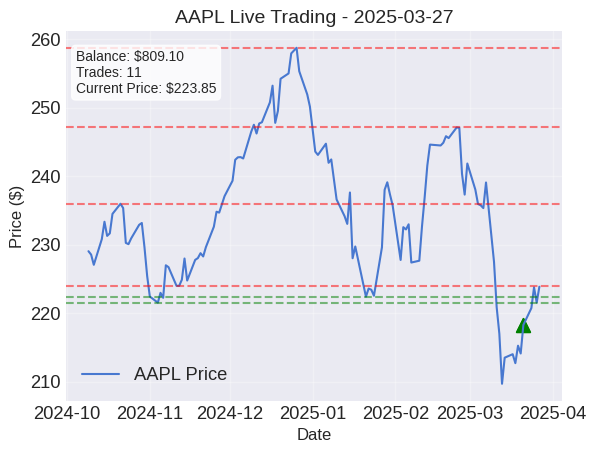

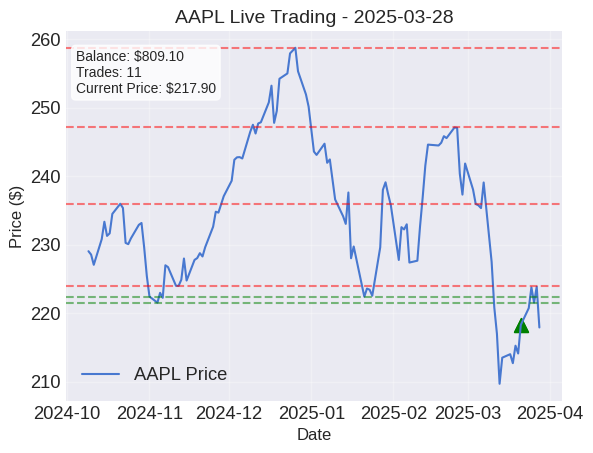

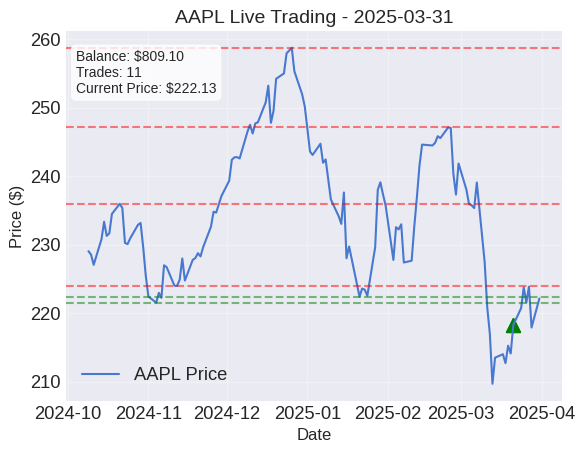

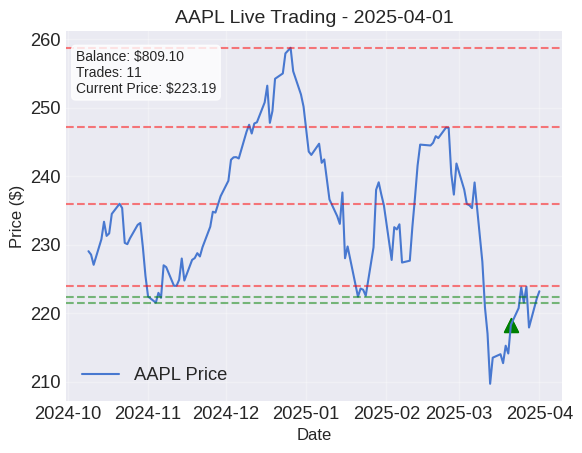

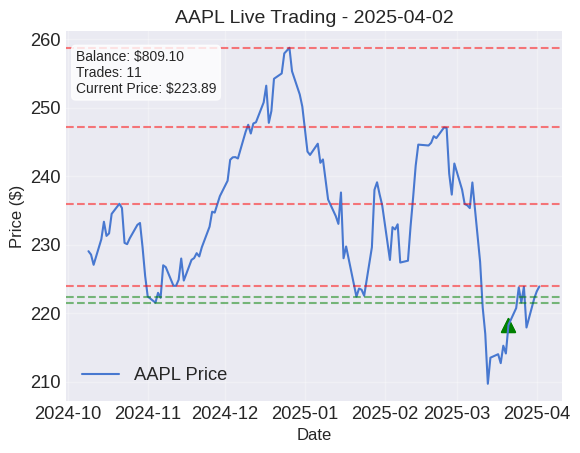

CLOSED LONG at $203.19 - 2025-04-03 - LOSS: $-13.46 (stop_loss)


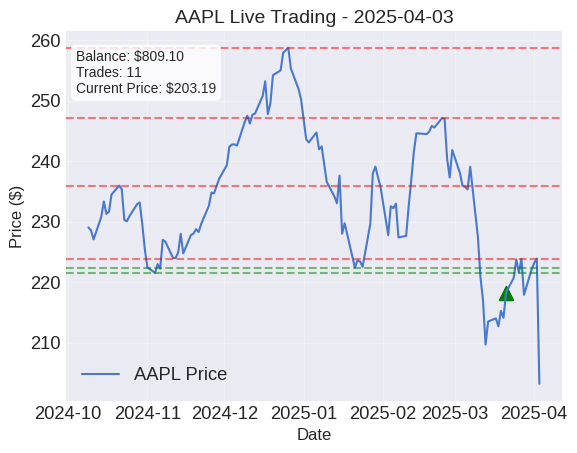

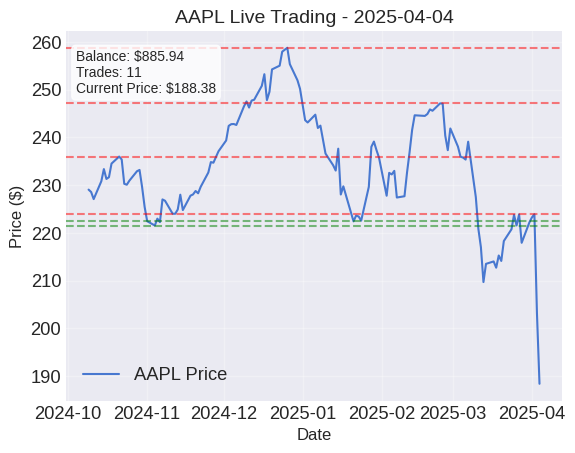

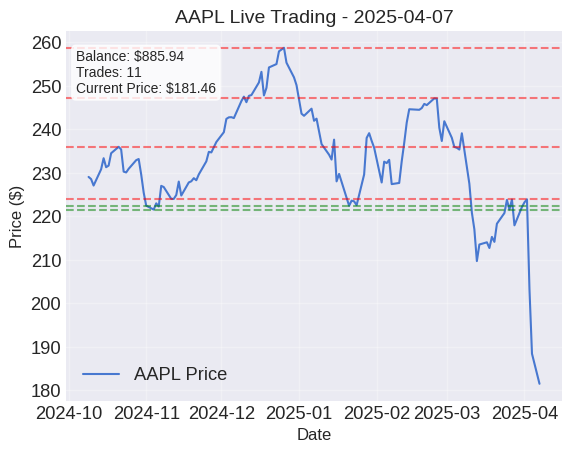

OPENED LONG at $172.42 - 2025-04-08


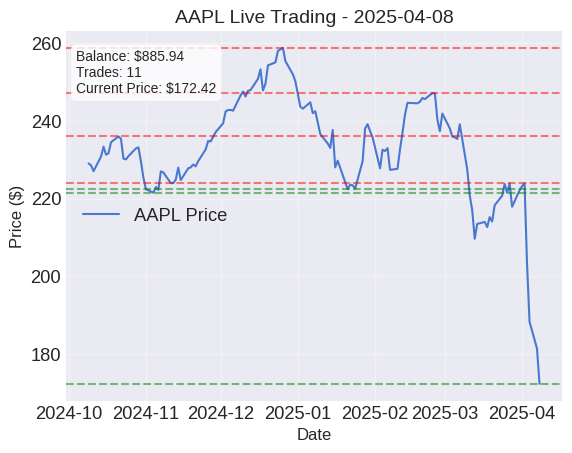

CLOSED LONG at $181.40 - 2025-04-09 - LOSS: $-2.48 (take_profit)


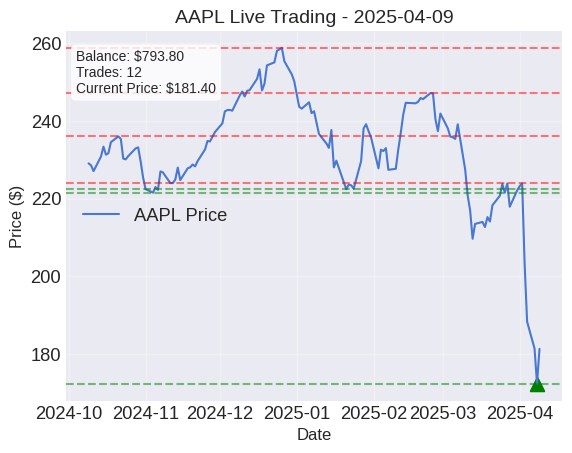


===== Trading Completed =====
Final balance: $879.92
Total trades: 12
Return: -12.01%

===== Closed Positions =====
[   {   'amount': 100.0,
        'entry_date': Timestamp('2024-12-19 00:00:00'),
        'entry_price': np.float64(249.51565551757812),
        'exit_date': Timestamp('2024-12-23 00:00:00'),
        'exit_price': np.float64(254.98965454101562),
        'fees_paid': 4.0,
        'id': 1,
        'profit_loss': np.float64(-10.193849925802295),
        'reason': 'stop_loss',
        'shares': np.float64(0.4007764554595457),
        'stop_loss_price': np.float64(254.5059686279297),
        'take_profit_price': np.float64(242.03018585205078),
        'type': 'short'},
    {   'amount': np.float64(98.58061500741978),
        'entry_date': Timestamp('2024-12-24 00:00:00'),
        'entry_price': np.float64(257.91644287109375),
        'exit_date': Timestamp('2024-12-31 00:00:00'),
        'exit_price': np.float64(250.1449737548828),
        'fees_paid': np.float64(3.94322460029

In [ ]:
class TradeDervs(FinancialInstrument):
    def __init__(self, ticker, data, initial_balance=1000):
        """Simple trading simulator that trades based on support and resistance"""
        super().__init__(ticker, data)
        self.balance = initial_balance
        self.initial_balance = initial_balance
        self.positions = []  # Current trades
        self.closed_positions = []  # Past trades
        self.trades = 0  # Number of trades made
        self.fees = 0.04  # Trading fee percentage

        #Using same style as before
        plt.style.use('seaborn-v0_8-darkgrid')

    def start_trading(self, speed=0.1, take_profit=0.03, stop_loss=0.02):
        print(f"Starting auto-trading for {self.ticker}")
        print(f"Initial balance: ${self.balance}")
        print(f"Take profit: {take_profit*100}%")
        print(f"Stop loss: {stop_loss*100}%")

        #Creating and adjusting the plot
        plt.figure(figsize=(24, 8))
        plt.ion()

        #Using previous method using inheritance
        sr_levels = self.resistance_support(plot=False)
        support_levels = [level[1] for level in sr_levels['support']]
        resistance_levels = [level[1] for level in sr_levels['resistance']]

        #Converting to dictionary -----------------------------------------
        price_data = {pd.to_datetime(self.data['Date'].iloc[i]): self.data['Close'].iloc[i]
                     for i in range(len(self.data))}

        dates = list(price_data.keys())
        dates.sort()

        #start form 50 days away from current time - start time
        start_idx = 50

        for i in range(start_idx, len(dates)):
            current_date = dates[i]
            current_price = price_data[current_date]

            #Look through 1 by 1 to avoid "peeking" into the future
            past_dates = dates[:i+1]
            past_prices = [price_data[d] for d in past_dates]

            #clearing the plot to replot the new "live" data
            plt.clf()
            plt.plot(past_dates, past_prices, 'b-', label=f'{self.ticker} Price')

            #Same lines as in previous function
            [plt.axhline(y=level, color='green', linestyle='--', alpha=0.5)
             for level in support_levels if min(past_prices) <= level <= max(past_prices)]

            [plt.axhline(y=level, color='red', linestyle='--', alpha=0.5)
             for level in resistance_levels if min(past_prices) <= level <= max(past_prices)]

            #This shows the direction of arrows when short or long positions are made
            for pos in self.positions:
                entry_date = pos['entry_date']
                entry_price = pos['entry_price']
                marker = '^' if pos['type'] == 'long' else 'v'
                color = 'green' if pos['type'] == 'long' else 'red'
                plt.scatter(entry_date, entry_price, color=color, marker=marker, s=100)

                plt.scatter(entry_date, entry_price, color=color, marker=marker, s=100)

            #Making and adding style to the plot
            plt.title(f'{self.ticker} Live Trading - {current_date.date()}', fontsize=14)
            plt.xlabel('Date', fontsize=12)
            plt.ylabel('Price ($)', fontsize=12)
            plt.grid(True, alpha=0.3)

            #porting over account info into graph
            info_text = f"Balance: ${self.balance:.2f}\n"
            info_text += f"Trades: {self.trades}\n"
            info_text += f"Current Price: ${current_price:.2f}"

            plt.annotate(info_text, xy=(0.02, 0.95), xycoords='axes fraction',
                        bbox=dict(boxstyle="round", fc="white", alpha=0.8),
                        fontsize=10, verticalalignment='top')

            #check every iteration
            self._check_for_trades(current_date, current_price, support_levels, resistance_levels, take_profit, stop_loss)

            #if found, update
            self._update_positions(current_date, current_price, take_profit, stop_loss)

            #Show the first plot
            plt.legend()
            plt.draw()
            plt.pause(speed)

        #prints at end
        print("\n===== Trading Completed =====")
        print(f"Final balance: ${self.balance:.2f}")
        print(f"Total trades: {self.trades}")
        return_pct = ((self.balance/self.initial_balance)-1)*100
        print(f"Return: {return_pct:.2f}%")

        #shows vertical list of closed pos
        import pprint
        print("\n===== Closed Positions =====")
        pp = pprint.PrettyPrinter(indent=4)
        pp.pprint(self.closed_positions)


        plt.ioff()
        plt.show()

    def _check_for_trades(self, date, price, support_levels, resistance_levels, take_profit, stop_loss):
        """Check if we should open any trades based on support/resistance"""
        #One position at a time
        if len(self.positions) > 0:
            return

        #Buying trigger (long pos)
        for level in support_levels:
            #within 2%
            if 0.98 * level <= price and price <= 1.02 * level:
                self._open_long(date, price, take_profit, stop_loss)
                return

        #Looking for short selling pos
        for level in resistance_levels:
            #with 2%
            if 0.98 * level <= price and price <= 1.02 * level:
                self._open_short(date, price, take_profit, stop_loss)
                return

    def _open_long(self, date, price, take_profit, stop_loss):
        """Open a long position"""
        # Simple position sizing - use 10% of balance
        amount = self.balance * 0.1
        shares = amount / price

        # Calculate fees
        fee_amount = amount * self.fees

        # Create position
        position = {
            'id': self.trades + 1,
            'type': 'long',
            'entry_date': date,
            'entry_price': price,
            'shares': shares,
            'amount': amount,
            'fees_paid': fee_amount,
            'take_profit_price': price * (1 + take_profit),
            'stop_loss_price': price * (1 - stop_loss)
        }

        # Update account
        self.positions.append(position)
        self.balance = self.balance - amount - fee_amount
        self.trades = self.trades + 1

        print(f"OPENED LONG at ${price:.2f} - {date.date()}")

    def _open_short(self, date, price, take_profit, stop_loss):
        """Open a short position"""
        # Simple position sizing - use 10% of balance
        amount = self.balance * 0.1
        shares = amount / price

        # Calculate fees
        fee_amount = amount * self.fees

        # Create position
        position = {
            'id': self.trades + 1,
            'type': 'short',
            'entry_date': date,
            'entry_price': price,
            'shares': shares,
            'amount': amount,
            'fees_paid': fee_amount,
            'take_profit_price': price * (1 - take_profit),
            'stop_loss_price': price * (1 + stop_loss)
        }

        # Update account
        self.positions.append(position)
        self.balance = self.balance - amount - fee_amount
        self.trades = self.trades + 1

        print(f"OPENED SHORT at ${price:.2f} - {date.date()}")

    def _update_positions(self, date, price, take_profit, stop_loss):
        """Update open positions and check for take profit/stop loss"""
        positions_to_close = []

        for position in self.positions:
            if position['type'] == 'long':
                #Check for take profit
                if price >= position['take_profit_price']:
                    positions_to_close.append((position, 'take_profit'))

                #Check for stop loss
                elif price <= position['stop_loss_price']:
                    positions_to_close.append((position, 'stop_loss'))

            else:
                #Check for take profit
                if price <= position['take_profit_price']:
                    positions_to_close.append((position, 'take_profit'))

                #Check for stop loss
                elif price >= position['stop_loss_price']:
                    positions_to_close.append((position, 'stop_loss'))

        #Close positions if meeting reason
        for position, reason in positions_to_close:
            self._close_position(position, date, price, reason)

    def _close_position(self, position, date, price, reason):
        """Close a position and calculate profit/loss"""
        exit_fee = position['amount'] * self.fees

        if position['type'] == 'long':
            profit_loss = position['shares'] * (price - position['entry_price']) - position['fees_paid'] - exit_fee
        else:#not stated byt for short pos
            profit_loss = position['shares'] * (position['entry_price'] - price) - position['fees_paid'] - exit_fee

        #appeding to lists
        position['exit_date'] = date
        position['exit_price'] = price
        position['profit_loss'] = profit_loss
        position['reason'] = reason

        #adjusts our pricipal witht he P/L
        self.balance = self.balance + position['amount'] + profit_loss

        #appending closed pos
        self.closed_positions.append(position)
        self.positions.remove(position)

        #printing some text for results
        if profit_loss > 0:
            result = "PROFIT"
        else:
            result = "LOSS"

        print(f"CLOSED {position['type'].upper()} at ${price:.2f} - {date.date()} - {result}: ${profit_loss:.2f} ({reason})")

    def resistance_support(self, window=20, prominence=0.05, plot=True):
        """Find support and resistance levels"""
        #using inheritance for the values
        prices = self.data['Close'].values
        dates = pd.to_datetime(self.data['Date'])

        #Finding mins and maxes from avalible data
        price_min = np.min(prices)
        price_max = np.max(prices)
        norm_prices = (prices - price_min) / (price_max - price_min)

        resistance_idx, _ = find_peaks(norm_prices, distance=window, prominence=prominence)
        support_idx, _ = find_peaks(-norm_prices, distance=window, prominence=prominence)

        #making a list of areas of resistance
        resistance_levels = prices[resistance_idx]
        support_levels = prices[support_idx]
        resistance_dates = dates[resistance_idx]
        support_dates = dates[support_idx]

        #horizontal plotting for res / sup lines
        if plot == True:
            plt.figure(figsize=(14, 8))
            plt.plot(dates, prices, label='Price')
            plt.scatter(resistance_dates, resistance_levels, color='red', label='Resistance')
            plt.scatter(support_dates, support_levels, color='green', label='Support')

            for level in set([round(x, -1) for x in resistance_levels]):
                plt.axhline(y=level, color='red', linestyle='--', alpha=0.3)

            for level in set([round(x, -1) for x in support_levels]):
                plt.axhline(y=level, color='green', linestyle='--', alpha=0.3)

            plt.title(f'{self.ticker} Support and Resistance Levels')
            plt.legend()
            plt.show()

        return {
            'resistance': list(zip(resistance_dates, resistance_levels)),
            'support': list(zip(support_dates, support_levels))
        }


#Example usage
if __name__ == "__main__":
    #Get stock data
    aapl = TradeDervs.follow_ticker("AAPL", 0.5)  # 1 year of Apple data

    #Start trading simulation
    aapl.start_trading(speed=0.01)  # Faster updates for demo